# COGS 108 - EDA Checkpoint

# Names

- Mingyi Li, Weiwen Dong (Part I)
- Yutian Shi, Jinyu Li (Part II)

<a id='research_question'></a>
# Research Question

Do Twitter users’ four different Myers–Briggs MBTI personality types (Analysts: NT, Diplomats: NF, Sentinels: SJ, Explorers: SP) influence their social media activeness and engagement? 

Within each aspect of the four dimensions (Mind: E/I, Energy: N/S, Nature: F/T, Tactics: J/P), are people with certain personality traits being more active and engaged than others, such as Extroverts versus Introverts within the Mind aspect?

# Dataset(s)

1. 
- Dataset Name: user_info.csv
- Source of the dataset: https://www.kaggle.com/datasets/sanketrai/twitter-mbti-dataset?select=user_info.csv
- Number of observations: 8328

This dataset contains Twitter users' activities on the Twitter, such as the number of followers, followings, and retweets, etc. We use it to measure the activeness and engagement of users.

2. 
- Dataset Name: mbti_labels.csv
- Source of the dataset: https://www.kaggle.com/datasets/sanketrai/twitter-mbti-dataset?select=mbti_labels.csv
- Number of observations: 8328

This dataset matches the user id with its personality type. By merging with user_info.csv and user_tweets.csv (by id), we can map each user activities with the MBTI personality type.

3. 
- Dataset Name: twitter_MBTI.csv
- Source of the dataset: https://www.kaggle.com/datasets/mazlumi/mbti-personality-type-twitter-dataset
- Number of observations: 7811


4. 
- Dataset Name: user_tweets.csv
- Source of the dataset: https://www.kaggle.com/datasets/sanketrai/twitter-mbti-dataset?select=user_tweets.csv
- Number of observations: 24598

These two datasets (#3 and #4) contain Twitter users tweet content. We use them to do some exploratory studies and see what are some most representative and frequent emojis each personality type usually uses.


### Combine multiple datasets:
We will merge user_info.csv(`info_df`) with mbti_labels.csv(`label_df`) and user_tweets.csv(`user_df`) by matching on their `'id'`. We will also extract emoji from twitter_MBTI.csv(`text_df`) and user_tweets.csv (`user_df`), which contain some most recent user tweets. To obtain the personality type information, we will create a `merged_df` by combining `mini_user_df` (a subset of cleaned user_df) and mbti_labels.csv (`user_mbti_df`).

# Setup

In [1]:
# Uncomment to install the new package
# ! pip install pandas
# ! pip install emoji
# ! pip install gdown
# ! pip install emoji --upgrade
# ! pip install urllib3==1.26.6

In [189]:
# Remember to import our package to run the file
import pandas as pd
import emoji
import numpy as np
import gdown
import scipy.stats as stats

In [3]:
# Make datasets have public access
DRIVE_URL = 'https://drive.google.com/uc?id='
USER_INFO_URL = 'https://drive.google.com/file/d/1_A6JiMIXGedcehE_uxP15DwBxVWvlPVR/view?usp=sharing'
MBTI_LABEL_URL = 'https://drive.google.com/file/d/1sbJXubnmHm6WEXL5pk7-XNInV9SLctrK/view?usp=sharing'
TWITTER_MBTI_URL = 'https://drive.google.com/file/d/1mIhlcu8P6YwMyuVJPrjLr33ZO54O1PSk/view?usp=sharing'
USER_TWEETS_URL = 'https://drive.google.com/file/d/1dbR_UdnXe-GjM3hj6ocFiMlx-ueJDqOJ/view?usp=sharing'

In [4]:
# Reformat URL from the Google Drive
def reformatURL(csv_url):
    return DRIVE_URL+ csv_url.split('/')[-2]

# Download large .csv files
def downloadLargeCSV(csv_url, filename):
    id = csv_url.split('/')[-2]
    url = DRIVE_URL+id
    output = filename+'.csv'
    gdown.download(url, output, quiet=False)
    return output

In [5]:
# Uncomment to download datasets
text_df = pd.read_csv(downloadLargeCSV(TWITTER_MBTI_URL, 'twitter_MBTI'))
user_df = pd.read_csv(downloadLargeCSV(USER_TWEETS_URL, 'user_tweets'))
# if the datasets have already been downloaded
#text_df = pd.read_csv('twitter_MBTI.csv')
#user_df = pd.read_csv('user_tweets.csv')

Downloading...
From: https://drive.google.com/uc?id=1mIhlcu8P6YwMyuVJPrjLr33ZO54O1PSk
To: /Users/littlebrown/Group_Sp23_RandomName/twitter_MBTI.csv
100%|██████████████████████████████████████| 77.6M/77.6M [00:26<00:00, 2.94MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1dbR_UdnXe-GjM3hj6ocFiMlx-ueJDqOJ
From (redirected): https://drive.google.com/uc?id=1dbR_UdnXe-GjM3hj6ocFiMlx-ueJDqOJ&confirm=t&uuid=1be55dc7-38e3-4e2b-a6a2-8223fbbe8526
To: /Users/littlebrown/Group_Sp23_RandomName/user_tweets.csv
100%|████████████████████████████████████████| 165M/165M [00:35<00:00, 4.66MB/s]
/Users/littlebrown/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95

In [6]:
# Read all datasets into dataframes
info_df = pd.read_csv(reformatURL(USER_INFO_URL))
label_df = pd.read_csv(reformatURL(MBTI_LABEL_URL))

# Data Cleaning

## Part I: Data Cleaning for Twitter User Activities Datasets (Datasets #1, #2)

For Twitter users' activeness and engagment information analysis, we used user_info.csv(info_df) and mbti_labels.csv(label_df), measuring them in 2 dimensions: one by user's interaction with others and one by user's tweeting activities. To clean the data, we selected columns with values we need and dropped NaN values.

In [7]:
info_df.head()

,id,id_str,name,screen_name,location,description,verified,followers_count,friends_count,listed_count,...,total_mentions_count,total_media_count,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count
0,160881623,160881623,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,False,1904,782,67,...,139,114,200.0,11.785000,3003.580000,0.980000,0.250000,0.185000,0.695000,0.570000
1,28968838,28968838,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,False,14135,1338,47,...,156,34,200.0,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000
2,2325006565,2325006565,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,False,1223,604,31,...,170,40,199.0,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005
3,907848145,907848145,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",False,8512,312,147,...,174,77,192.0,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042
4,1330237585,1330237585,Sei💫,nemuiryuu,NaN,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,False,1805,340,69,...,127,99,200.0,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000


In [8]:
label_df.head()

,id,mbti_personality
0,160881623,infp
1,28968838,infp
2,2325006565,infp
3,907848145,infp
4,1330237585,infp


In [9]:
# merge two sets based on ID
complete_df = info_df.merge(label_df, left_on='id', right_on='id')

In [10]:
complete_df.head()

,id,id_str,name,screen_name,location,description,verified,followers_count,friends_count,listed_count,...,total_media_count,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count,mbti_personality
0,160881623,160881623,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,False,1904,782,67,...,114,200.0,11.785000,3003.580000,0.980000,0.250000,0.185000,0.695000,0.570000,infp
1,28968838,28968838,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,False,14135,1338,47,...,34,200.0,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000,infp
2,2325006565,2325006565,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,False,1223,604,31,...,40,199.0,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005,infp
3,907848145,907848145,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",False,8512,312,147,...,77,192.0,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042,infp
4,1330237585,1330237585,Sei💫,nemuiryuu,NaN,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,False,1805,340,69,...,99,200.0,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000,infp


## Explore Missingness 
We first explored the datasets and found that all the missing values are the columns that contain private information (e.g. account name, location). We removed all columns that contain such private identifiable information and selected ones that were most useful for measuring social media activeness and engagement.

In [11]:
info_df.isna().sum(axis = 0)

id                                 0
id_str                             0
name                               1
screen_name                        0
location                        1199
description                      119
verified                           0
followers_count                    0
friends_count                      0
listed_count                       0
favourites_count                   0
statuses_count                     0
number_of_quoted_statuses          0
number_of_retweeted_statuses       0
total_retweet_count                0
total_favorite_count               0
total_hashtag_count                0
total_url_count                    0
total_mentions_count               0
total_media_count                  0
number_of_tweets_scraped           0
average_tweet_length               0
average_retweet_count              0
average_favorite_count             0
average_hashtag_count              0
average_url_count                  0
average_mentions_count             0
a

In [12]:
info_df.dtypes

id                                int64
id_str                            int64
name                             object
screen_name                      object
location                         object
description                      object
verified                           bool
followers_count                   int64
friends_count                     int64
listed_count                      int64
favourites_count                  int64
statuses_count                    int64
number_of_quoted_statuses         int64
number_of_retweeted_statuses      int64
total_retweet_count               int64
total_favorite_count              int64
total_hashtag_count               int64
total_url_count                   int64
total_mentions_count              int64
total_media_count                 int64
number_of_tweets_scraped        float64
average_tweet_length            float64
average_retweet_count           float64
average_favorite_count          float64
average_hashtag_count           float64


To measure social media activeness & engagement, we categorized our data into two types based on what we had. The first category (member_df) is related to user interactions: the number of followers, followings, and listed groups. The second category (tweet_df) is related to tweeting activities: the number of total tweets, favorite tweets, and total hashtags of tweets.

In [13]:
# select columns for measuring activeness & engagement
member_df = complete_df[['mbti_personality', 'id','followers_count', 'friends_count', 'listed_count']]
tweet_df = complete_df[['mbti_personality','id','favourites_count', 'statuses_count','total_hashtag_count']]

In [14]:
# rename confusing col names based on the description in the data source
member_df = member_df.rename(columns={"friends_count": "following_count"})
tweet_df.columns = ['mbti_personality','id','liked_count', 'total_tweets_count', 'total_hashtag_count']

In [15]:
tweet_df.head()

,mbti_personality,id,liked_count,total_tweets_count,total_hashtag_count
0,infp,160881623,133836,410600,50
1,infp,28968838,103794,358901,82
2,infp,2325006565,178178,312384,71
3,infp,907848145,40136,282995,77
4,infp,1330237585,151521,244181,16


In [16]:
member_df.head()

,mbti_personality,id,followers_count,following_count,listed_count
0,infp,160881623,1904,782,67
1,infp,28968838,14135,1338,47
2,infp,2325006565,1223,604,31
3,infp,907848145,8512,312,147
4,infp,1330237585,1805,340,69


In [17]:
# drop nan values
member_df = member_df.dropna(how='all')
tweet_df = tweet_df.dropna(how='all')
print(member_df.shape, tweet_df.shape)

(8328, 5) (8328, 5)


# Data Analysis & Results (EDA)

In [18]:
#! pip install seaborn

In [19]:
#! pip install scipy

In [20]:
# import packages to do visualization
import seaborn as sns
sns.set(font_scale=2, style="white")
import matplotlib.pyplot as plt
# import packages for statistics
from scipy.stats import f_oneway
import scipy.stats

In [21]:
# Categorize each personality into four types (identities)
def getFourTypes(mbti_str):
    if 'nt'in mbti_str:
        return 'Analysts'
    elif 'nf' in mbti_str:
        return 'Diplomats'
    elif ('sfj' in mbti_str) or ('stj' in mbti_str):
        return 'Sentinels'
    elif ('sfp' in mbti_str) or ('stp' in mbti_str):
        return 'Explorers'

In [22]:
member_df['Four_Type'] = member_df['mbti_personality'].apply(getFourTypes)
tweet_df['Four_Type'] = tweet_df['mbti_personality'].apply(getFourTypes)

### Explore different attributes in our dataframes: 

```member_df```: followers_count, following_count, listed_count

```tweet_df```: liked_count, total_tweets_count, total_hashtag_count

In [23]:
# Describe and explore some statistics of all the attributes for 16 personalities
member_df.groupby(['mbti_personality','Four_Type']).describe()

id                                          \
                            count          mean           std         min   
mbti_personality Four_Type                                                  
enfj             Diplomats  723.0  8.945780e+16  2.718101e+17     32643.0   
enfp             Diplomats  900.0  1.156846e+17  3.085055e+17      2654.0   
entj             Analysts   677.0  8.786957e+16  2.727702e+17   1479681.0   
entp             Analysts   586.0  1.249488e+17  3.137407e+17    742883.0   
esfj             Sentinels  236.0  1.344761e+17  3.218253e+17  14569594.0   
esfp             Explorers  202.0  1.505594e+17  3.398379e+17   3578811.0   
estj             Sentinels  221.0  8.973310e+16  2.668727e+17   1329371.0   
estp             Explorers  147.0  2.325662e+17  3.999588e+17   9908862.0   
infj             Diplomats  917.0  1.440556e+17  3.397987e+17    787880.0   
infp             Diplomats  899.0  1.952864e+17  3.871438e+17     12444.0   
intj             Analysts   905.0  1.193870e+17  3.113853e+17       295.0   
intp             Analysts   712.0  1.726672e+17  3.657103e+17     39623.0   
isfj             Sentinels  420.0  9.844203e+16  2.904675e+17      5203.0   
isfp             Explorers  232.0  2.203852e+17  3.919153e+17   2871341.0   
istj             Sentinels  342.0  1.211637e+17  3.159246e+17    777702.0   
istp             Explorers  209.0  2.543177e+17  4.074993e+17   1003511.0   

                                                                     \
                                     25%          50%           75%   
mbti_personality Four_Type                                            
enfj             Diplomats  4.359582e+07  225553559.0  1.070522e+09   
enfp             Diplomats  3.605069e+07  211514965.0  1.307172e+09   
entj             Analysts   4.147000e+07  219046687.0  1.215217e+09   
entp             Analysts   5.947345e+07  311927499.0  2.456835e+09   
esfj             Sentinels  6.301940e+07  234802503.5  1.761929e+09   
esfp             Explorers  7.530429e+07  318866463.5  2.727957e+09   
estj             Sentinels  4.891880e+07  228934723.0  8.647522e+08   
estp             Explorers  2.219877e+08  628128886.0  7.151617e+17   
infj             Diplomats  3.806712e+07  284868921.0  2.477657e+09   
infp             Diplomats  5.783648e+07  430507728.0  3.267275e+09   
intj             Analysts   2.753888e+07  188954079.0  1.569291e+09   
intp             Analysts   4.842214e+07  351026671.0  2.846300e+09   
isfj             Sentinels  5.670682e+07  297284197.0  2.016056e+09   
isfp             Explorers  1.021961e+08  558637736.0  4.876055e+09   
istj             Sentinels  4.588166e+07  231696811.0  1.849396e+09   
istp             Explorers  1.215901e+08  856046587.0  7.413868e+17   

                                         followers_count               ...  \
                                     max           count         mean  ...   
mbti_personality Four_Type                                             ...   
enfj             Diplomats  1.140033e+18           723.0  1963.118949  ...   
enfp             Diplomats  1.157056e+18           900.0  2591.627778  ...   
entj             Analysts   1.173605e+18           677.0  2722.358936  ...   
entp             Analysts   1.166486e+18           586.0  2120.215017  ...   
esfj             Sentinels  1.169602e+18           236.0  2765.406780  ...   
esfp             Explorers  1.125126e+18           202.0  2605.465347  ...   
estj             Sentinels  1.170123e+18           221.0  2869.751131  ...   
estp             Explorers  1.132781e+18           147.0  1572.102041  ...   
infj             Diplomats  1.176568e+18           917.0  4162.583424  ...   
infp             Diplomats  1.175158e+18           899.0  3869.899889  ...   
intj             Analysts   1.163835e+18           905.0  4303.625414  ...   
intp             Analysts   1.171712e+18           712.0  4142.523876  ...   
isfj             Sentinels  1.121230e+18       

In [24]:
tweet_df.groupby(['mbti_personality','Four_Type']).describe()

id                                          \
                            count          mean           std         min   
mbti_personality Four_Type                                                  
enfj             Diplomats  723.0  8.945780e+16  2.718101e+17     32643.0   
enfp             Diplomats  900.0  1.156846e+17  3.085055e+17      2654.0   
entj             Analysts   677.0  8.786957e+16  2.727702e+17   1479681.0   
entp             Analysts   586.0  1.249488e+17  3.137407e+17    742883.0   
esfj             Sentinels  236.0  1.344761e+17  3.218253e+17  14569594.0   
esfp             Explorers  202.0  1.505594e+17  3.398379e+17   3578811.0   
estj             Sentinels  221.0  8.973310e+16  2.668727e+17   1329371.0   
estp             Explorers  147.0  2.325662e+17  3.999588e+17   9908862.0   
infj             Diplomats  917.0  1.440556e+17  3.397987e+17    787880.0   
infp             Diplomats  899.0  1.952864e+17  3.871438e+17     12444.0   
intj             Analysts   905.0  1.193870e+17  3.113853e+17       295.0   
intp             Analysts   712.0  1.726672e+17  3.657103e+17     39623.0   
isfj             Sentinels  420.0  9.844203e+16  2.904675e+17      5203.0   
isfp             Explorers  232.0  2.203852e+17  3.919153e+17   2871341.0   
istj             Sentinels  342.0  1.211637e+17  3.159246e+17    777702.0   
istp             Explorers  209.0  2.543177e+17  4.074993e+17   1003511.0   

                                                                     \
                                     25%          50%           75%   
mbti_personality Four_Type                                            
enfj             Diplomats  4.359582e+07  225553559.0  1.070522e+09   
enfp             Diplomats  3.605069e+07  211514965.0  1.307172e+09   
entj             Analysts   4.147000e+07  219046687.0  1.215217e+09   
entp             Analysts   5.947345e+07  311927499.0  2.456835e+09   
esfj             Sentinels  6.301940e+07  234802503.5  1.761929e+09   
esfp             Explorers  7.530429e+07  318866463.5  2.727957e+09   
estj             Sentinels  4.891880e+07  228934723.0  8.647522e+08   
estp             Explorers  2.219877e+08  628128886.0  7.151617e+17   
infj             Diplomats  3.806712e+07  284868921.0  2.477657e+09   
infp             Diplomats  5.783648e+07  430507728.0  3.267275e+09   
intj             Analysts   2.753888e+07  188954079.0  1.569291e+09   
intp             Analysts   4.842214e+07  351026671.0  2.846300e+09   
isfj             Sentinels  5.670682e+07  297284197.0  2.016056e+09   
isfp             Explorers  1.021961e+08  558637736.0  4.876055e+09   
istj             Sentinels  4.588166e+07  231696811.0  1.849396e+09   
istp             Explorers  1.215901e+08  856046587.0  7.413868e+17   

                                         liked_count                ...  \
                                     max       count          mean  ...   
mbti_personality Four_Type                                          ...   
enfj             Diplomats  1.140033e+18       723.0  17359.600277  ...   
enfp             Diplomats  1.157056e+18       900.0  19617.057778  ...   
entj             Analysts   1.173605e+18       677.0  13380.898080  ...   
entp             Analysts   1.166486e+18       586.0  14873.709898  ...   
esfj             Sentinels  1.169602e+18       236.0  18837.737288  ...   
esfp             Explorers  1.125126e+18       202.0  13013.935644  ...   
estj             Sentinels  1.170123e+18       221.0  10973.280543  ...   
estp             Explorers  1.132781e+18       147.0   8589.517007  ...   
infj             Diplomats  1.176568e+18       917.0  23754.846238  ...   
infp             Diplomats  1.175158e+18       899.0  23731.512792  ...   
intj             Analysts   1.163835e+18       905.0  18690.883978  ...   
intp             Analysts   1.171712e+18       712.0  18209.860955  ...   
isfj             Sentinels  1.121230e+18       420.0  16944.626190  ...   
isfp             

There are too many data, so we want to separate each attribute and then explore.

#### Section I: User Interaction Activeness (followers_count, following_count, listed_count)
#### Explore followers_count (Twitter Users' total followers)

In [25]:
# describe each personality's followers count
member_df.groupby(['mbti_personality','Four_Type']).followers_count.describe()

,,count,mean,std,min,25%,50%,75%,max
mbti_personality,Four_Type,,,,,,,,
enfj,Diplomats,723.0,1963.118949,5464.469251,9.0,541.00,915.0,1620.00,105072.0
enfp,Diplomats,900.0,2591.627778,9502.373248,56.0,596.25,996.0,1928.50,217603.0
entj,Analysts,677.0,2722.358936,6307.252843,10.0,572.00,974.0,1986.00,57681.0
entp,Analysts,586.0,2120.215017,4965.113035,2.0,465.00,916.0,1697.50,75739.0
esfj,Sentinels,236.0,2765.406780,17593.395175,43.0,494.75,864.5,1472.00,268186.0
esfp,Explorers,202.0,2605.465347,15011.564902,0.0,470.00,816.5,1583.75,211474.0
estj,Sentinels,221.0,2869.751131,14101.072088,33.0,507.00,888.0,1684.00,206024.0
estp,Explorers,147.0,1572.102041,2772.903784,11.0,388.00,863.0,1568.00,20366.0
infj,Diplomats,917.0,4162.583424,12667.925871,43.0,804.00,1445.0,2807.00,232488.0


In [26]:
# plot the total distribution of followers count
def histTotalCount(attr_name):
    sns.histplot(data=member_df, x=attr_name)

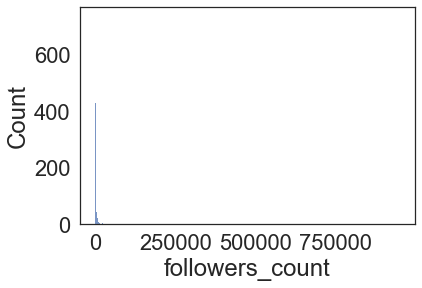

In [27]:
histTotalCount('followers_count')

Most of the data are clustered within 0-100000. We can try to limit our x-axis to 120000.

In [28]:
def histTotalCountLimit(attr_name, x_limit):
    sns.histplot(data=member_df, x=attr_name)
    plt.xlim(1, x_limit)
    plt.show()

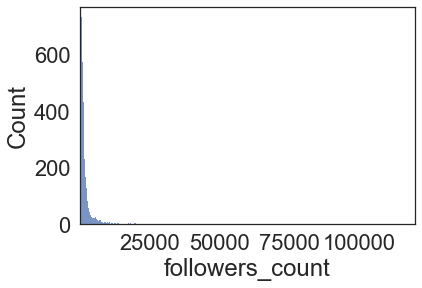

In [29]:
histTotalCountLimit("followers_count", 120000)

The plot is highly right-skewed and most of the data is clustered within 20000. We can limit x-axis to 20000 to see what happens.

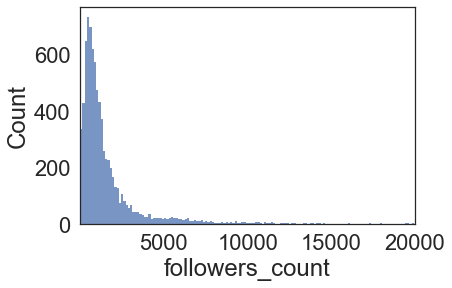

In [30]:
histTotalCountLimit("followers_count", 20000)

We can see from the graph that most of the Twitter users have followers count ranging from 0-2500. 

Next, we want to explore how the data be like when it's being categorized by four types (Analysts, Diplomats, Sentinels, Explorers)

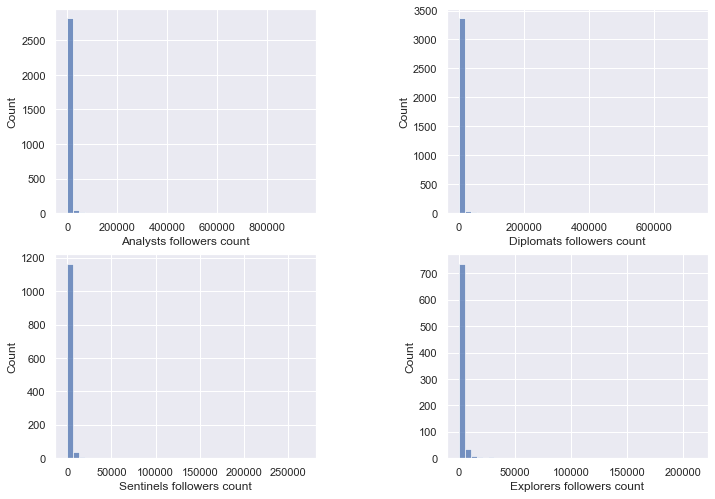

In [31]:
 # when we directly plot histogram of followers data grouped by personality type, we found it is really skewed
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'followers_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts followers count')

sns.histplot(x = 'followers_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats followers count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'followers_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels followers count')

sns.histplot(x = 'followers_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers followers count')
plt.subplots_adjust(wspace=0.5)


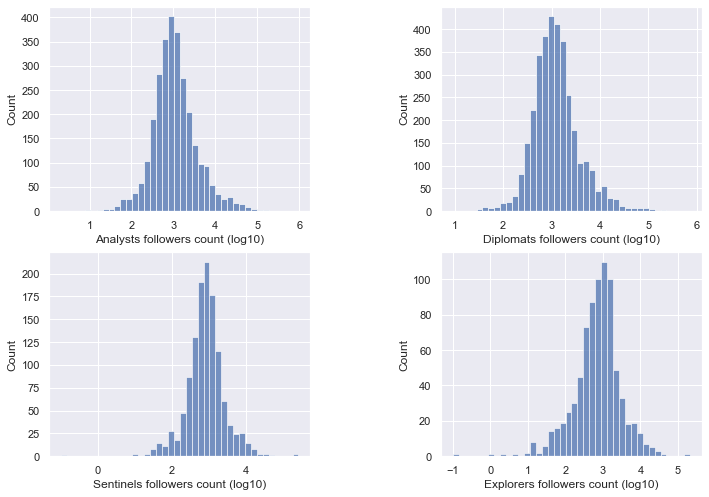

In [32]:
# so we do log operation(with 0.1 as offset) to normalize and better visualize the trend   
log_10_follwers_count = np.log10(member_df['followers_count'] + 0.1)
member_df['log_10_follwers_count'] = log_10_follwers_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_follwers_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts followers count (log10)')

sns.histplot(x = 'log_10_follwers_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats followers count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_follwers_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels followers count (log10)')

sns.histplot(x = 'log_10_follwers_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers followers count (log10)')
plt.subplots_adjust(wspace=0.5)
       

 Although we find several -1 value in explorers, we don't find any extreme outlier. Therefore, we will not conduct any removal at this point. 

 Also, because data is extremely skewed, we will use median, instead of mean, for further analysis on user activeness. 
 
 #TODO reword it but not entirely reject 'mean' since the stats needs mean

#### Explore followering_count (Twitter Users' total followings)

Again, we want to start with the total population before grouping it by four types.

In [33]:
# describe each 16 personality's following count
member_df.groupby(['mbti_personality','Four_Type']).following_count.describe()

,,count,mean,std,min,25%,50%,75%,max
mbti_personality,Four_Type,,,,,,,,
enfj,Diplomats,723.0,1250.482711,3296.449194,0.0,432.50,757.0,1299.00,56879.0
enfp,Diplomats,900.0,1484.494444,5275.919271,0.0,481.00,830.5,1375.25,131722.0
entj,Analysts,677.0,1145.630724,1844.740464,0.0,340.00,692.0,1295.00,24397.0
entp,Analysts,586.0,965.511945,1339.881634,0.0,355.25,680.5,1145.00,22346.0
esfj,Sentinels,236.0,1244.648305,6302.677060,0.0,302.00,542.0,1035.75,96022.0
esfp,Explorers,202.0,883.980198,1937.252219,0.0,288.75,520.5,988.50,23540.0
estj,Sentinels,221.0,1944.936652,14031.516806,0.0,367.00,680.0,1256.00,208848.0
estp,Explorers,147.0,589.156463,595.283456,0.0,188.50,392.0,846.50,3494.0
infj,Diplomats,917.0,2295.725191,9320.132236,7.0,487.00,942.0,1742.00,212479.0


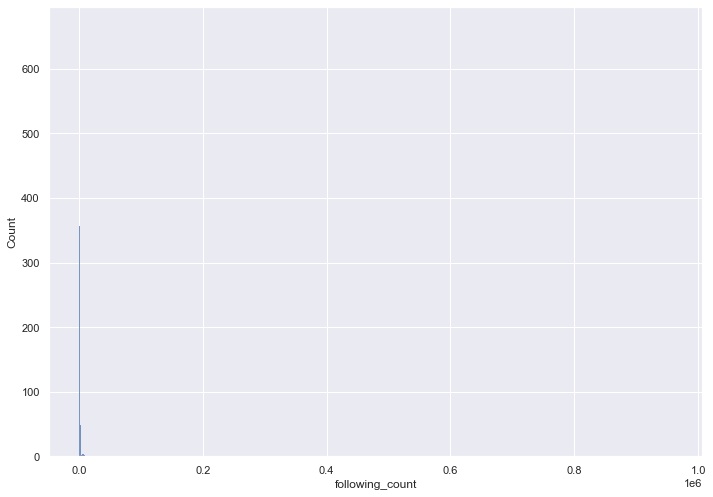

In [34]:
# Plot total followings count
histTotalCount('following_count')

Most of the data is clustered under 0.05e6, it's interesting to see how some people have a really large number of followings. We limit the x-axis to 50000 and see what happens.

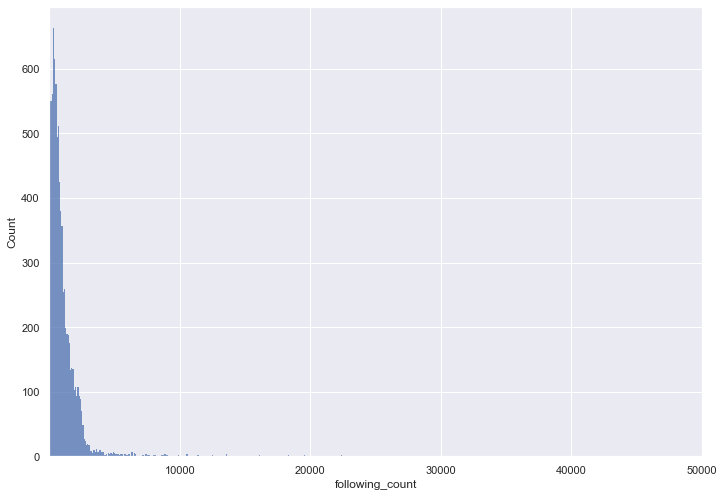

In [35]:
histTotalCountLimit("following_count", 50000)

It gets slightly more clear. Let's limit the x-axis to 10000 since most of the data is ranged between 0-10000.

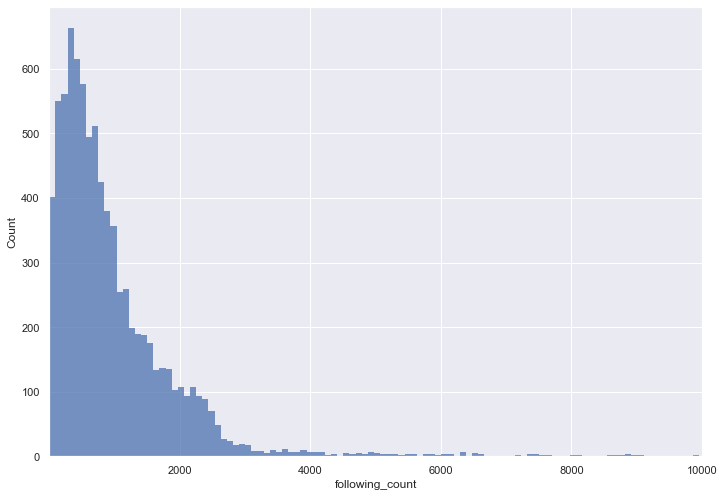

In [36]:
histTotalCountLimit("following_count", 10000)

Now we have a better understanding of the overall distribution of the followings count. Most of the Twitter users have the range from 0-4000 with some outliers that have significantly more followings.

Next, we group users by their four types and see what happens.

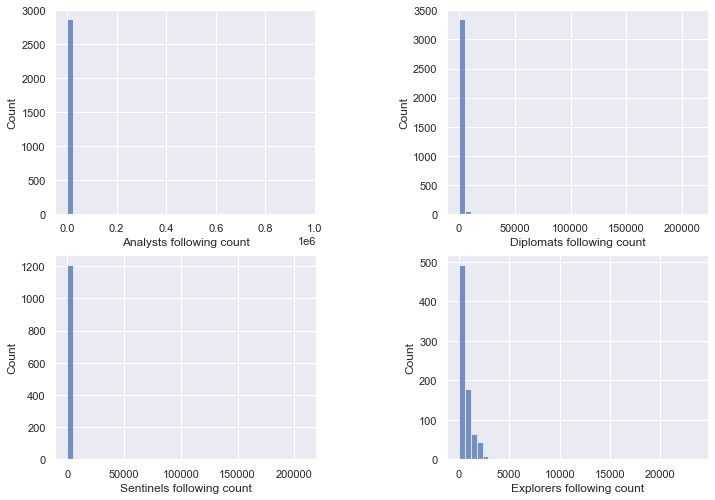

In [37]:
 # when we directly plot histogram of followers data grouped by personality type, we found it is really skewed
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'following_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts following count')

sns.histplot(x = 'following_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats following count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'following_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels following count')

sns.histplot(x = 'following_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers following count')
plt.subplots_adjust(wspace=0.5)


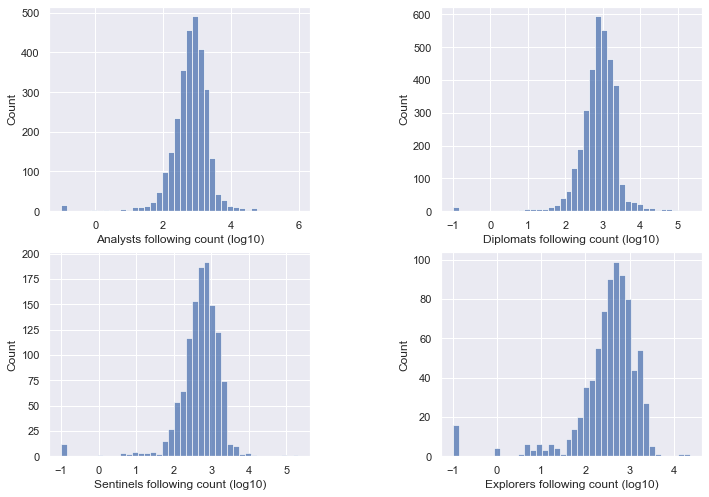

In [38]:
log_10_following_count = np.log10(member_df['following_count'] + 0.1)
member_df['log_10_following_count'] = log_10_following_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_following_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts following count (log10)')

sns.histplot(x = 'log_10_following_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats following count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_following_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels following count (log10)')

sns.histplot(x = 'log_10_following_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers following count (log10)')
plt.subplots_adjust(wspace=0.5)

#### Explore listed_count (Twitter Users' total listed groups)

We start with the total population and see how the listed counts look like.

In [39]:
# describe 16 personalities' listed count
member_df.groupby(['mbti_personality', 'Four_Type']).listed_count.describe()

,,count,mean,std,min,25%,50%,75%,max
mbti_personality,Four_Type,,,,,,,,
enfj,Diplomats,723.0,40.178423,110.786511,0.0,6.0,15.0,37.00,2111.0
enfp,Diplomats,900.0,47.720000,133.315968,0.0,7.0,19.0,44.25,3151.0
entj,Analysts,677.0,57.834564,130.472500,0.0,7.0,18.0,60.00,1575.0
entp,Analysts,586.0,40.837884,96.202294,0.0,6.0,18.0,40.00,1816.0
esfj,Sentinels,236.0,34.487288,119.063526,0.0,3.0,10.5,28.25,1580.0
esfp,Explorers,202.0,22.326733,72.831860,0.0,2.0,7.5,20.50,980.0
estj,Sentinels,221.0,42.868778,133.469118,0.0,5.0,15.0,40.00,1827.0
estp,Explorers,147.0,16.231293,23.044646,0.0,2.0,7.0,20.00,149.0
infj,Diplomats,917.0,98.702290,328.470133,0.0,15.0,34.0,83.00,5727.0


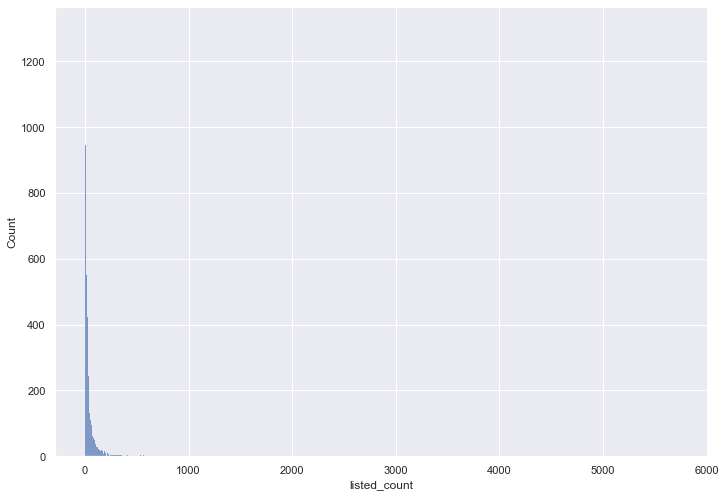

In [40]:
# Plot total listed count
histTotalCount('listed_count')

We see some significantly large number of listed count as expected. Since most of them is clustered between 0-500. Let's limit our x-axis.

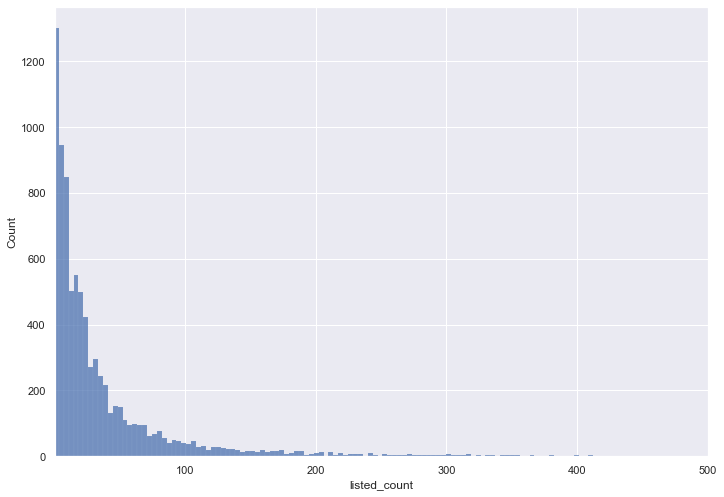

In [41]:
histTotalCountLimit('listed_count',500)

The graph is still highly right-skewed, but we see that most of users have a range from 0 to 200.

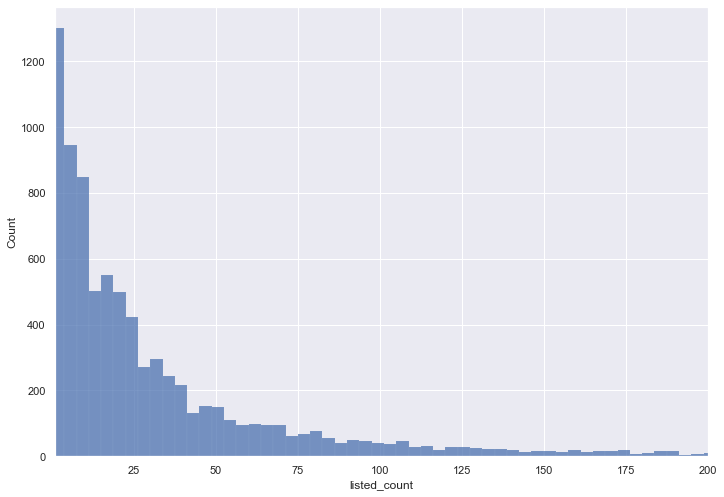

In [42]:
histTotalCountLimit('listed_count',200)

Now we have a better understanding of the listed count for the total population. Most of them has a range of 0-100 with some outliers that have significant numbers of total listed groups.

Let's move on with the counts categorized by four types.

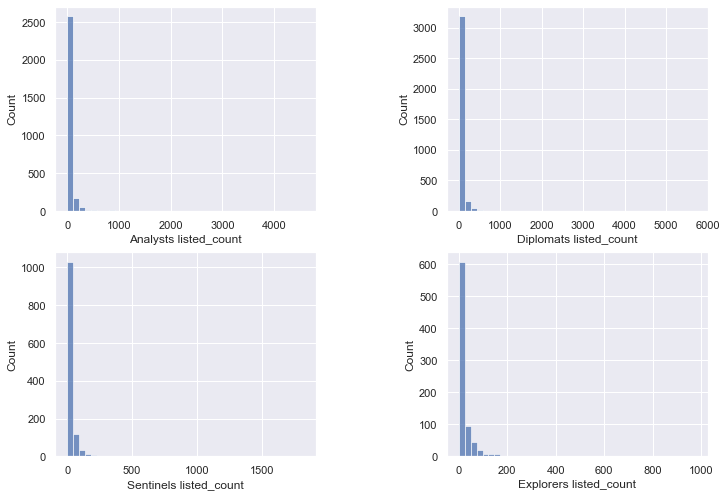

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'listed_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts listed_count')

sns.histplot(x = 'listed_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats listed_count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'listed_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels listed_count')

sns.histplot(x = 'listed_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers listed_count')
plt.subplots_adjust(wspace=0.5)

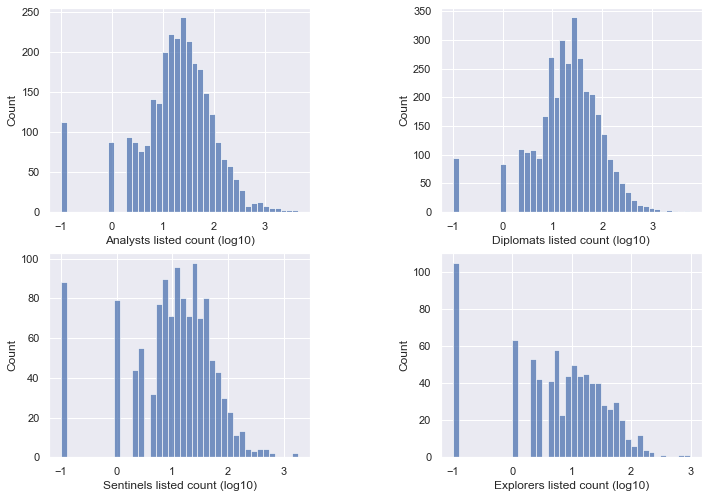

In [44]:
log_10_listed_count = np.log10(member_df['listed_count'] + 0.1)
member_df['log_10_listed_count'] = log_10_listed_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_listed_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts listed count (log10)')

sns.histplot(x = 'log_10_listed_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats listed count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_listed_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels listed count (log10)')

sns.histplot(x = 'log_10_listed_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers listed count (log10)')
plt.subplots_adjust(wspace=0.5)

After exploring each attribute that informs the User Interaction Activeness (followers, followings, and listed), we can check their relationship with each other.
#TODO think about the relationship plots: e.g. scatterplot for followers & followings

#### Section II: Tweeting Activeness (liked_count, total_tweets_count, total_hashtag_count)
#### Explore liked_count (The number of tweets liked by the Twitter user)

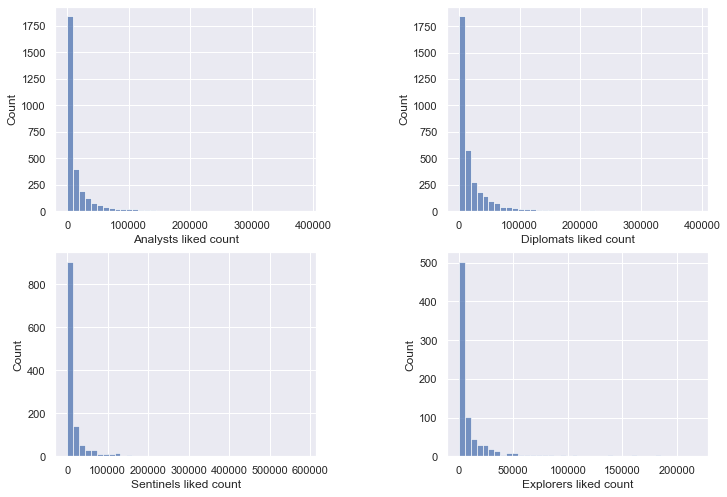

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'liked_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts liked count')

sns.histplot(x = 'liked_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats liked count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'liked_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels liked count')

sns.histplot(x = 'liked_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers liked count')
plt.subplots_adjust(wspace=0.5)

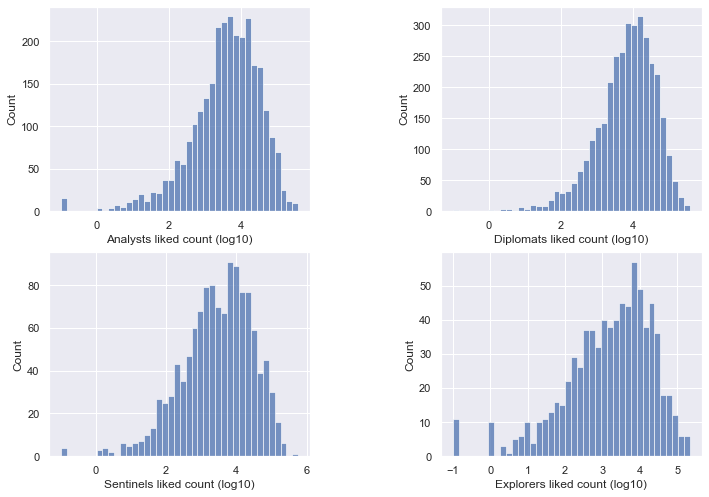

In [46]:
log_10_liked_count = np.log10(tweet_df['liked_count'] + 0.1)
tweet_df['log_10_liked_count'] = log_10_liked_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_liked_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts liked count (log10)')

sns.histplot(x = 'log_10_liked_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats liked count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_liked_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels liked count (log10)')

sns.histplot(x = 'log_10_liked_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers liked count (log10)')
plt.subplots_adjust(wspace=0.5)

#### Explore total_tweets_count (The number of tweets posted by the Twitter user)

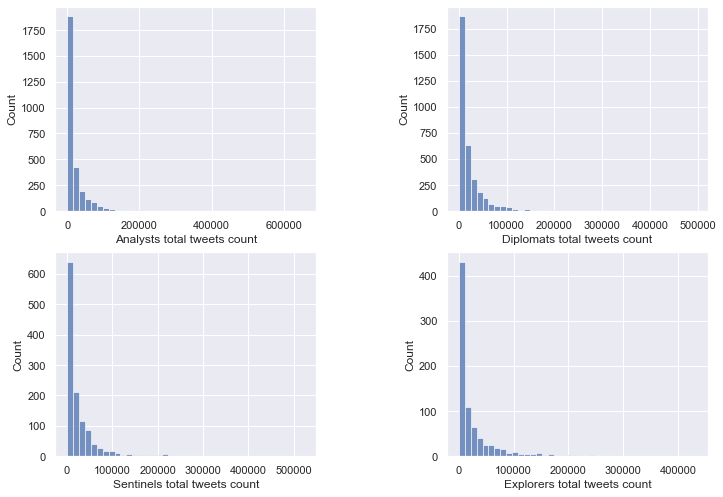

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts total tweets count')

sns.histplot(x = 'total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats total tweets count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels total tweets count')

sns.histplot(x = 'total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers total tweets count')
plt.subplots_adjust(wspace=0.5)

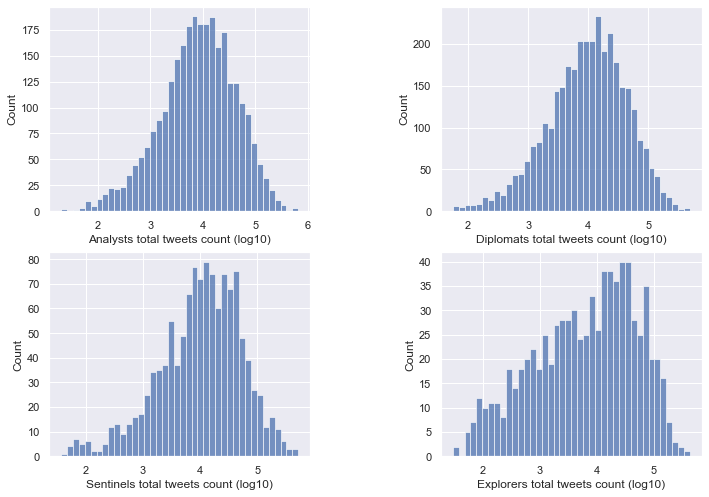

In [48]:
log_10_total_tweets_count = np.log10(tweet_df['total_tweets_count'] + 0.1)
tweet_df['log_10_total_tweets_count'] = log_10_total_tweets_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts total tweets count (log10)')

sns.histplot(x = 'log_10_total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats total tweets count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels total tweets count (log10)')

sns.histplot(x = 'log_10_total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers total tweets count (log10)')
plt.subplots_adjust(wspace=0.5)

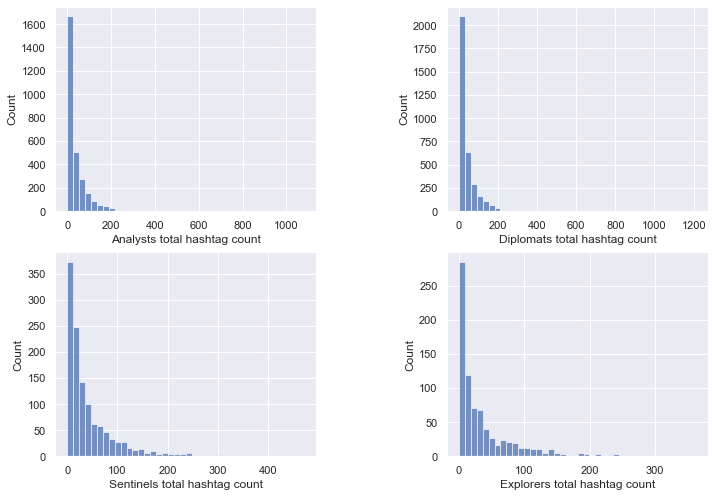

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts total hashtag count')

sns.histplot(x = 'total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats total hashtag count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels total hashtag count')

sns.histplot(x = 'total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers total hashtag count')
plt.subplots_adjust(wspace=0.5)

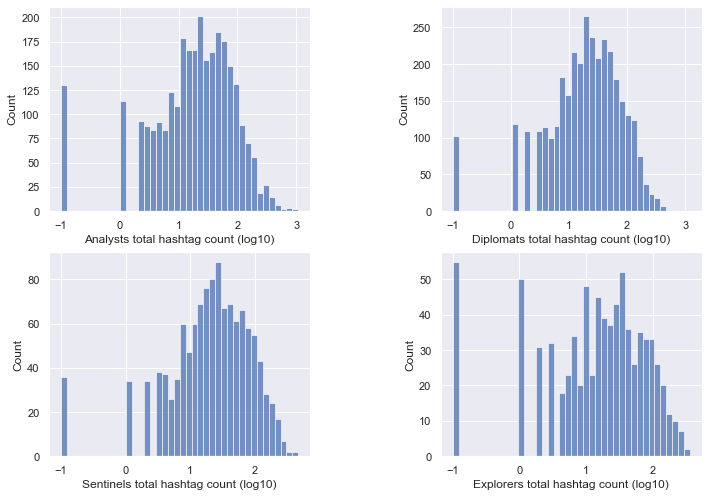

In [50]:
log_10_total_hashtag_count = np.log10(tweet_df['total_hashtag_count'] + 0.1)
tweet_df['log_10_total_hashtag_count'] = log_10_total_hashtag_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts total hashtag count (log10)')

sns.histplot(x = 'log_10_total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats total hashtag count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels total hashtag count (log10)')

sns.histplot(x = 'log_10_total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers total hashtag count (log10)')
plt.subplots_adjust(wspace=0.5)

We then explored some possibilities of calculating social media activeness.
We got data from each user and then group it into four types, then we measure the medium of each type since all the distribution is largely right skewed (the mean is far greater than the medium). We chose the medium (50%) as each group's measurement since it won't be affected much by the outliers.

For tweeting activeness, we gave each data different weights because we regard users being more "active and engaged" if they post their own tweets and share thoughts rather than just collecting and favoriting others' tweets.

#TODO: discuss about the activeness index for tweeting activities

In [51]:
# Calculate tweeting activeness & engagement (by Four Types)
def getTweetActiveness(liked, tweets, hashtag):
    return liked*0.25 + tweets*0.5 + hashtag*0.25

In [52]:
tweets_medium_four = tweet_df.groupby('Four_Type').total_tweets_count.describe()['50%']
liked_medium_four = tweet_df.groupby('Four_Type').liked_count.describe()['50%']
collected_medium_four = tweet_df.groupby('Four_Type').total_hashtag_count.describe()['50%']

In [53]:
print(tweets_medium_four, liked_medium_four, collected_medium_four)

Four_Type
Analysts      8743.5
Diplomats    10575.0
Explorers     7992.5
Sentinels    12075.0
Name: 50%, dtype: float64 Four_Type
Analysts     4655.0
Diplomats    8352.0
Explorers    2154.0
Sentinels    3428.0
Name: 50%, dtype: float64 Four_Type
Analysts     21.0
Diplomats    21.0
Explorers    18.0
Sentinels    22.0
Name: 50%, dtype: float64


In [54]:
Analysts_tw_activeness = getTweetActiveness(liked_medium_four[0], tweets_medium_four[0], collected_medium_four[0])
print('Analysts: Tweeting Behavior Activeness is ', Analysts_tw_activeness)
Diplomats_tw_activeness = getTweetActiveness(liked_medium_four[1], tweets_medium_four[1], collected_medium_four[1])
print('Diplomats: Tweeting Behavior Activeness is ', Diplomats_tw_activeness)
Explorers_tw_activeness = getTweetActiveness(liked_medium_four[2], tweets_medium_four[2], collected_medium_four[2])
print('Explorers: Tweeting Behavior Activeness is ', Explorers_tw_activeness)
Sentinels_tw_activeness = getTweetActiveness(liked_medium_four[3], tweets_medium_four[3], collected_medium_four[3])
print('Sentinels: Tweeting Behavior Activeness is ', Sentinels_tw_activeness)

Analysts: Tweeting Behavior Activeness is  5540.75
Diplomats: Tweeting Behavior Activeness is  7380.75
Explorers: Tweeting Behavior Activeness is  4539.25
Sentinels: Tweeting Behavior Activeness is  6900.0


For the user-interaction activeness, we gave different data different weights again. 

Those were our first exploratory step and the specific weighted value could be changed later.
We regard the number of followers and followings having the same weights, but less weight for the listed. This is because 'listed' counts how many people list this user into certain groups, which happens not as frequently as how people usually engage with others on Twitter (by following and being followed).

#TODO: discuss the user activities (I like this weight though) #typo👀

In [55]:
# Calculate user interaction activeness & engagement (by Four Types)
def getUserActiveness(followers, followings, listed):
    return followers*0.4 + followings*0.4 + listed*0.2

In [268]:
member_df.columns

Index(['mbti_personality', 'id', 'followers_count', 'following_count',
       'listed_count', 'Four_Type', 'log_10_follwers_count',
       'log_10_following_count', 'log_10_listed_count', 'mind', 'energy',
       'nature', 'tactics', 'UserActiveness'],
      dtype='object')

In [269]:
member_df['listed_count'].max()

5727

In [270]:
member_df['following_count'].max()

958249

In [271]:
member_df['followers_count'].max()

951791

In [56]:
follower_medium_four = member_df.groupby('Four_Type').followers_count.describe()['50%']
following_medium_four = member_df.groupby('Four_Type').following_count.describe()['50%']
listed_medium_four = member_df.groupby('Four_Type').listed_count.describe()['50%']

In [57]:
print(follower_medium_four, following_medium_four, listed_medium_four)

Four_Type
Analysts      965.0
Diplomats    1110.0
Explorers     789.5
Sentinels     822.0
Name: 50%, dtype: float64 Four_Type
Analysts     697.5
Diplomats    844.0
Explorers    432.5
Sentinels    564.0
Name: 50%, dtype: float64 Four_Type
Analysts     21.0
Diplomats    22.0
Explorers     8.0
Sentinels    13.0
Name: 50%, dtype: float64


In [58]:
all_interaction = []
for i in range(4):
    identity = ''
    if i==0:
        identity = 'Analysts'
    elif i==1:
        identity = 'Diplomats'
    elif i==2:
        identity = 'Explorers'
    else:
        identity = 'Sentinels'
    active_index = getUserActiveness(follower_medium_four[i], following_medium_four[i], listed_medium_four[i])
    all_interaction.append(active_index)
    print(identity + ': User Interaction Activeness is '+ str(active_index))

Analysts: User Interaction Activeness is 669.2
Diplomats: User Interaction Activeness is 786.0
Explorers: User Interaction Activeness is 490.40000000000003
Sentinels: User Interaction Activeness is 557.0000000000001


In [59]:
active_array = {
                'Four Types': ['Analysts', 'Diplomats','Explorers','Sentinels'],
                'Tweeting Activeness': [Analysts_tw_activeness, Diplomats_tw_activeness, 
                                        Explorers_tw_activeness,Sentinels_tw_activeness],
                 'Interaction Activeness': [all_interaction[0],all_interaction[1],
                                            all_interaction[2],all_interaction[3]]
                }
  
active_df = pd.DataFrame(active_array) #index=['Analysts', 'Diplomats','Explorers','Sentinels']

#active_df['Total Activeness'] = active_df['Tweeting Activeness'] + active_df['Interaction Activeness']
active_df

,Four Types,Tweeting Activeness,Interaction Activeness
0,Analysts,5540.75,669.2
1,Diplomats,7380.75,786.0
2,Explorers,4539.25,490.4
3,Sentinels,6900.00,557.0


### Explore the social activeness and engagement by four types
We divide it into two parts: Tweeting Activeness and User Interaction Activeness

#### Explore Tweeting Activeness

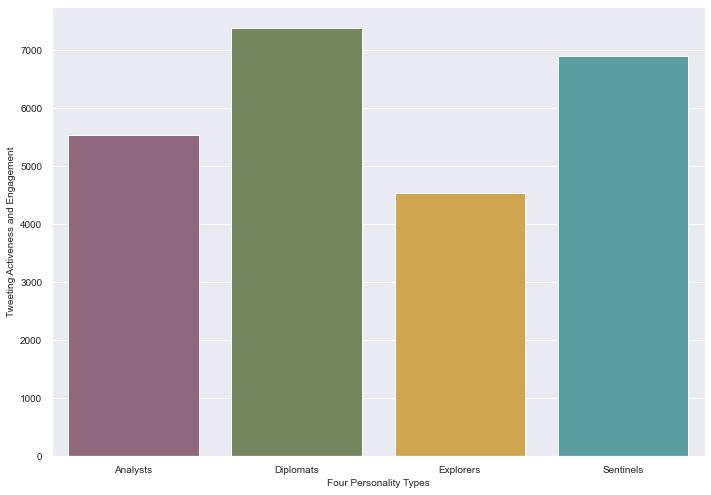

In [60]:
colors = ['#95627b', '#738d56', '#e4ae3a','#50a9aa'] # the color set for each type
sns.barplot(data=active_df, x=active_df['Four Types'], y='Tweeting Activeness', palette=colors)
plt.xlabel('Four Personality Types', fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel('Tweeting Activeness and Engagement', fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

#### Explore User Interaction Activeness

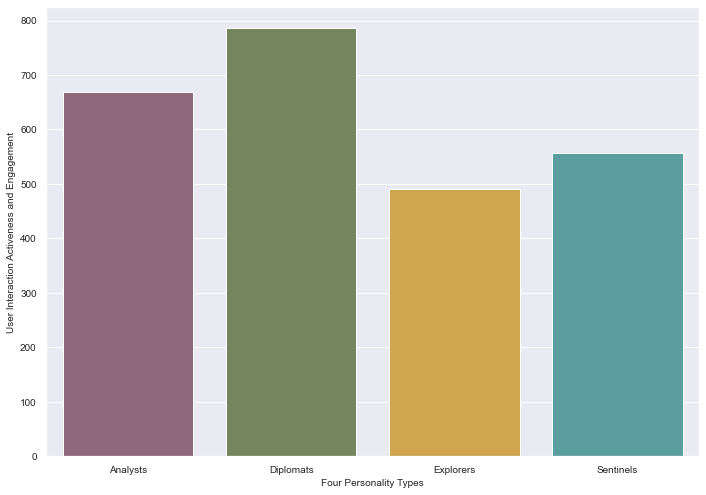

In [61]:
sns.barplot(data=active_df, x=active_df['Four Types'], y='Interaction Activeness', palette=colors)
plt.xlabel('Four Personality Types', fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel('User Interaction Activeness and Engagement', fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Using our calculation, check the activeness values for the whole observations.

#TODO: perhaps change an order (total->four type)

In [62]:
# Get the medium for all users in the datasets
# Tweeting Activeness
tweets_medium_all = tweet_df.total_tweets_count.describe()['50%']
liked_medium_all = tweet_df.liked_count.describe()['50%']
hashtag_medium_all = tweet_df.total_hashtag_count.describe()['50%']
Tweet_all = getTweetActiveness(liked_medium_all,tweets_medium_all,hashtag_medium_all)

# Interaction Activeness
follower_medium_all = member_df.followers_count.describe()['50%']
following_medium_all = member_df.following_count.describe()['50%']
listed_medium_all = member_df.listed_count.describe()['50%']
Interact_all = getUserActiveness(follower_medium_all,following_medium_all,listed_medium_all)
print('The medium of all tweeting activeness:', Tweet_all)
print('The medium of all user interaction activeness:', Interact_all)

The medium of all tweeting activeness: 6400.375
The medium of all user interaction activeness: 680.4


In [63]:
# Create a new df: engagement_df that combines all activeness-related attributes
engagement_df = member_df.merge(tweet_df,on=['id','Four_Type','mbti_personality'])

In [64]:
engagement_df

,mbti_personality,id,followers_count,following_count,listed_count,Four_Type,log_10_follwers_count,log_10_following_count,log_10_listed_count,liked_count,total_tweets_count,total_hashtag_count,log_10_liked_count,log_10_total_tweets_count,log_10_total_hashtag_count
0,infp,160881623,1904,782,67,Diplomats,3.279690,2.893262,1.826723,133836,410600,50,5.126573,5.613419,1.699838
1,infp,28968838,14135,1338,47,Diplomats,4.150299,3.126489,1.673021,103794,358901,82,5.016173,5.554975,1.914343
2,infp,2325006565,1223,604,31,Diplomats,3.087462,2.781109,1.492760,178178,312384,71,5.250854,5.494689,1.851870
3,infp,907848145,8512,312,147,Diplomats,3.930037,2.494294,2.167613,40136,282995,77,4.603535,5.451779,1.887054
4,infp,1330237585,1805,340,69,Diplomats,3.256501,2.531607,1.839478,151521,244181,16,5.180473,5.387712,1.206826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,estj,489644768,289,264,10,Sentinels,2.461048,2.421768,1.004321,442,265,15,2.645521,2.423410,1.178977
8324,estj,3061139834,43,128,0,Sentinels,1.634477,2.107549,-1.000000,6,245,257,0.785330,2.389343,2.410102
8325,estj,329077476,103,115,0,Sentinels,2.013259,2.061075,-1.000000,45,112,46,1.654177,2.049606,1.663701
8326,estj,781835161394614272,49,119,0,Sentinels,1.691081,2.075912,-1.000000,2,75,29,0.322219,1.875640,1.463893


In [65]:
# Get social media activeness for each observation
def getTweeting(data):
    return getTweetActiveness(data['liked_count'],data['total_tweets_count'],data['total_hashtag_count']) 

def getInteraction(data):
    return getUserActiveness(data['followers_count'],data['following_count'],data['listed_count'])

In [66]:
# Apply the function to a new column
engagement_df['Tweeting Activeness'] = engagement_df.apply(getTweeting, axis=1)
engagement_df['Interaction Activeness'] = engagement_df.apply(getInteraction, axis=1)

In [67]:
engagement_df

,mbti_personality,id,followers_count,following_count,listed_count,Four_Type,log_10_follwers_count,log_10_following_count,log_10_listed_count,liked_count,total_tweets_count,total_hashtag_count,log_10_liked_count,log_10_total_tweets_count,log_10_total_hashtag_count,Tweeting Activeness,Interaction Activeness
0,infp,160881623,1904,782,67,Diplomats,3.279690,2.893262,1.826723,133836,410600,50,5.126573,5.613419,1.699838,238771.50,1087.8
1,infp,28968838,14135,1338,47,Diplomats,4.150299,3.126489,1.673021,103794,358901,82,5.016173,5.554975,1.914343,205419.50,6198.6
2,infp,2325006565,1223,604,31,Diplomats,3.087462,2.781109,1.492760,178178,312384,71,5.250854,5.494689,1.851870,200754.25,737.0
3,infp,907848145,8512,312,147,Diplomats,3.930037,2.494294,2.167613,40136,282995,77,4.603535,5.451779,1.887054,151550.75,3559.0
4,infp,1330237585,1805,340,69,Diplomats,3.256501,2.531607,1.839478,151521,244181,16,5.180473,5.387712,1.206826,159974.75,871.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,estj,489644768,289,264,10,Sentinels,2.461048,2.421768,1.004321,442,265,15,2.645521,2.423410,1.178977,246.75,223.2
8324,estj,3061139834,43,128,0,Sentinels,1.634477,2.107549,-1.000000,6,245,257,0.785330,2.389343,2.410102,188.25,68.4
8325,estj,329077476,103,115,0,Sentinels,2.013259,2.061075,-1.000000,45,112,46,1.654177,2.049606,1.663701,78.75,87.2
8326,estj,781835161394614272,49,119,0,Sentinels,1.691081,2.075912,-1.000000,2,75,29,0.322219,1.875640,1.463893,45.25,67.2


#TODO ANOVA Assumtions Check

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

The samples are independent.

Each sample is from a normally distributed population.

The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Important: the following test assumes the conditions are met. If it's not being met, re-format the values and then do the test. The overall structure of ANOVA will not change though.

In [68]:
# ANOVA Test
# Perform one-way ANOVA on multidimentional activity arrays
def getTypeActArray(four_type):
    ft_df = engagement_df[engagement_df['Four_Type']==four_type]
    print('the size of '+four_type+' is', ft_df.shape[0])
    stacked_arr = np.column_stack((ft_df['Tweeting Activeness'].values,
                                   ft_df['Interaction Activeness'].values))
    return stacked_arr

## consider about outliers? 👀

In [69]:
F, p = scipy.stats.f_oneway(getTypeActArray('Analysts'), 
                            getTypeActArray('Diplomats'),
                            getTypeActArray('Explorers'),
                            getTypeActArray('Sentinels'))
print('F statistic is: ', F)
print('p-value is: ', p)

the size of Analysts is 2880
the size of Diplomats is 3439
the size of Explorers is 790
the size of Sentinels is 1219
F statistic is:  [3.44947709 3.07069131]
p-value is:  [0.01586736 0.02665516]


#TODO: think about the alpha value, 0.01 or 0.05? If 0.01, our values are significant.

#TODO: think about Hypothesis (no hurry but nice to get some feedback)

(re-phrase it in a more anova way)
e.g. We reject the null hypothesis.
Twitter users’ four different Myers–Briggs MBTI personality types (Analysts: NT, Diplomats: NF, Sentinels: SJ, Explorers: SP) will influence their social media activeness and engagement.

## EDA II: Four Dimensions (Mind: E/I, Energy: N/S, Nature: F/T, Tactics: J/P)

### 1) add 4 dimensions ('mind', 'energy', 'nature', 'tactics')

In [70]:
def mbti_to_letter(s):
    return list(s)

In [71]:
member_df[['mind', 'energy', 'nature', 'tactics']] = (pd.DataFrame
                                                      (member_df['mbti_personality']
                                                       .apply(mbti_to_letter).to_list()))
tweet_df[['mind', 'energy', 'nature', 'tactics']] = (pd.DataFrame
                                                     (tweet_df['mbti_personality']
                                                      .apply(mbti_to_letter).to_list()))

In [72]:
member_df.head()

,mbti_personality,id,followers_count,following_count,listed_count,Four_Type,log_10_follwers_count,log_10_following_count,log_10_listed_count,mind,energy,nature,tactics
0,infp,160881623,1904,782,67,Diplomats,3.279690,2.893262,1.826723,i,n,f,p
1,infp,28968838,14135,1338,47,Diplomats,4.150299,3.126489,1.673021,i,n,f,p
2,infp,2325006565,1223,604,31,Diplomats,3.087462,2.781109,1.492760,i,n,f,p
3,infp,907848145,8512,312,147,Diplomats,3.930037,2.494294,2.167613,i,n,f,p
4,infp,1330237585,1805,340,69,Diplomats,3.256501,2.531607,1.839478,i,n,f,p


In [73]:
tweet_df.head()

,mbti_personality,id,liked_count,total_tweets_count,total_hashtag_count,Four_Type,log_10_liked_count,log_10_total_tweets_count,log_10_total_hashtag_count,mind,energy,nature,tactics
0,infp,160881623,133836,410600,50,Diplomats,5.126573,5.613419,1.699838,i,n,f,p
1,infp,28968838,103794,358901,82,Diplomats,5.016173,5.554975,1.914343,i,n,f,p
2,infp,2325006565,178178,312384,71,Diplomats,5.250854,5.494689,1.851870,i,n,f,p
3,infp,907848145,40136,282995,77,Diplomats,4.603535,5.451779,1.887054,i,n,f,p
4,infp,1330237585,151521,244181,16,Diplomats,5.180473,5.387712,1.206826,i,n,f,p


### 2) distribution

In [74]:
member_df['followers_count'].max()

951791

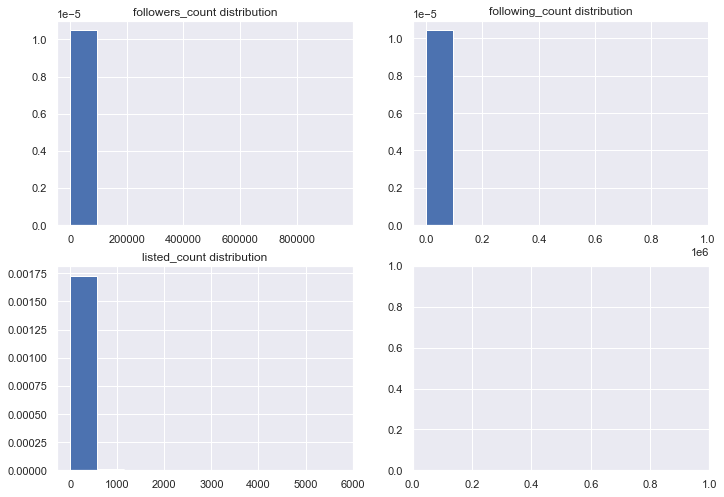

In [274]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.hist(member_df['followers_count'], density = True)
ax1.hist(member_df['following_count'], density = True)
ax2.hist(member_df['listed_count'], density = True)
ax0.set_title('followers_count distribution')
ax1.set_title('following_count distribution')
ax2.set_title('listed_count distribution')
plt.show()

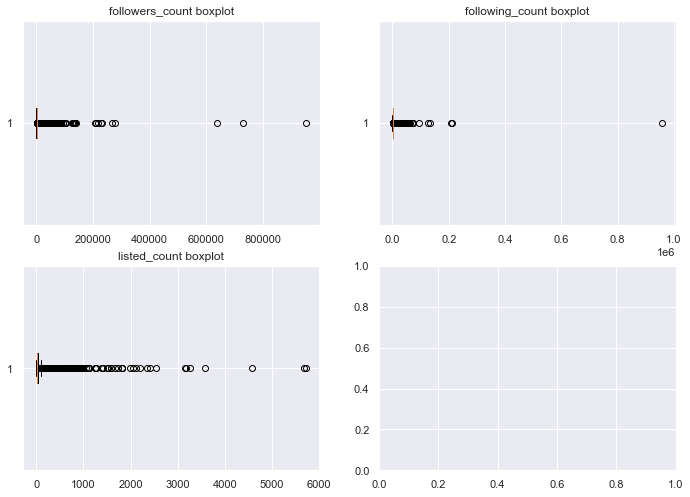

In [76]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.boxplot(member_df['followers_count'], vert=False)
ax1.boxplot(member_df['following_count'], vert=False)
ax2.boxplot(member_df['listed_count'], vert=False)
ax0.set_title('followers_count boxplot')
ax1.set_title('following_count boxplot')
ax2.set_title('listed_count boxplot')
plt.show()

## Two methods to filter outliers for better visulization

### 3. Remove outlier 🔔

In [77]:
def remove_outliers(s):
    #return a series for plotting
    q1 = np.percentile(s, 25)
    q3 = np.percentile(s, 75)
    IQR = q3-q1
    upper = q3+1.5*IQR
    lower = q3-1.5*IQR
    return s[(s>=lower)&(s<=upper)]

In [78]:
def remove_outliers_for_df(df, col_name):
    #return a dataframe
    q1 = np.percentile(df[col_name], 25)
    q3 = np.percentile(df[col_name], 75)
    IQR = q3-q1
    upper = q3+1.5*IQR
    lower = q3-1.5*IQR
    return df[(df[col_name]>=lower)&(df[col_name]<=upper)]

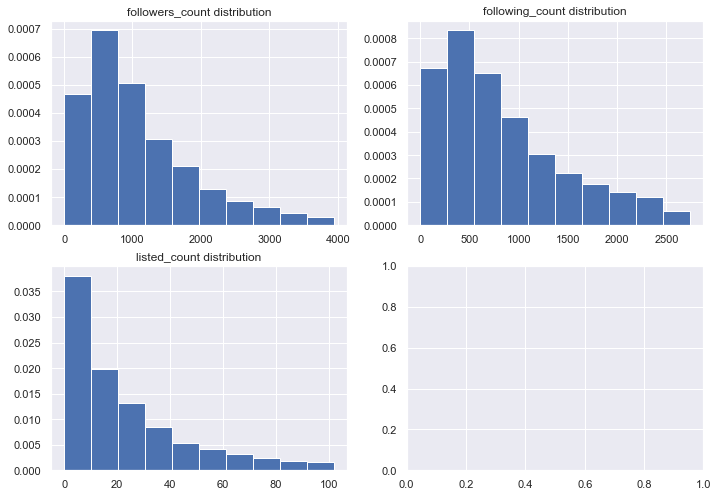

In [79]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.hist(remove_outliers(member_df['followers_count']), density = True)
ax1.hist(remove_outliers(member_df['following_count']), density = True)
ax2.hist(remove_outliers(member_df['listed_count']), density = True)
ax0.set_title('followers_count distribution')
ax1.set_title('following_count distribution')
ax2.set_title('listed_count distribution')
plt.show()

————————🔔

### by density (would like to apply this to all measurements)

In [80]:
test_df = remove_outliers_for_df(member_df, 'followers_count')

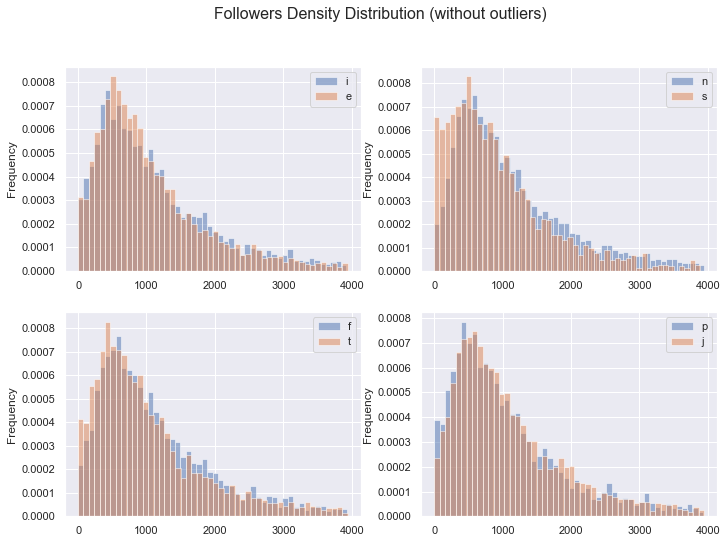

In [81]:
plt.subplot(2, 2, 1)
test_df[test_df['mind']=='i']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['mind']=='e']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["i", "e"])
plt.subplot(2, 2, 2)
test_df[test_df['energy']=='n']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['energy']=='s']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["n", "s"])
plt.subplot(2, 2, 3)
test_df[test_df['nature']=='f']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['nature']=='t']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["f", "t"])
plt.subplot(2, 2, 4)
test_df[test_df['tactics']=='p']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['tactics']=='j']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["p", "j"]);
plt.suptitle(t="Followers Density Distribution (without outliers)", fontsize=16);

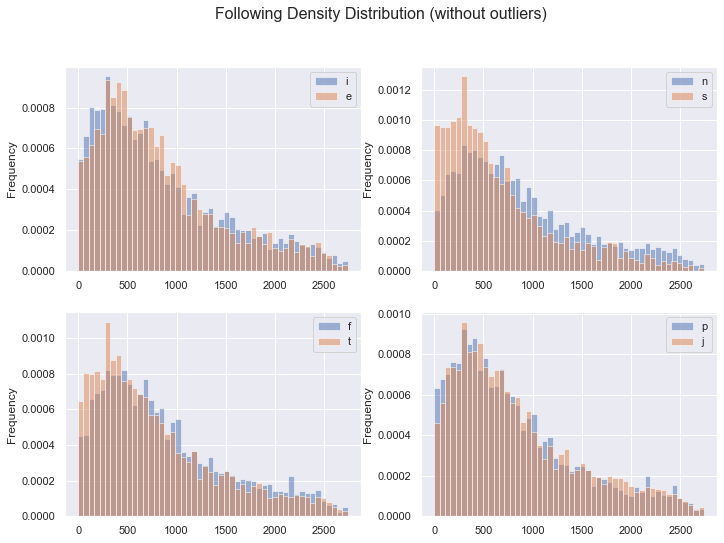

In [126]:
test_df = remove_outliers_for_df(member_df, 'following_count')
plt.subplot(2, 2, 1)
test_df[test_df['mind']=='i']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['mind']=='e']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["i", "e"])
plt.subplot(2, 2, 2)
test_df[test_df['energy']=='n']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['energy']=='s']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["n", "s"])
plt.subplot(2, 2, 3)
test_df[test_df['nature']=='f']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['nature']=='t']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["f", "t"])
plt.subplot(2, 2, 4)
test_df[test_df['tactics']=='p']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['tactics']=='j']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["p", "j"]);
plt.suptitle(t="Following Density Distribution (without outliers)", fontsize=16);

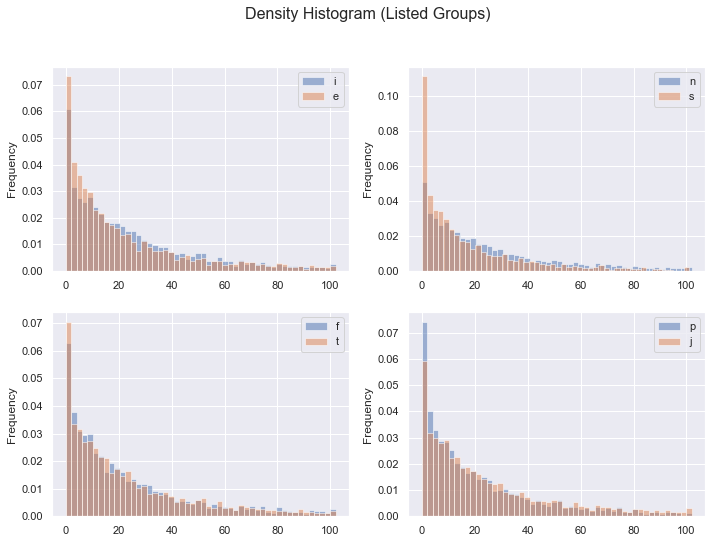

In [277]:
test_df = remove_outliers_for_df(member_df, 'listed_count')
plt.subplot(2, 2, 1)
test_df[test_df['mind']=='i']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['mind']=='e']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["i", "e"])
plt.subplot(2, 2, 2)
test_df[test_df['energy']=='n']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['energy']=='s']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["n", "s"])
plt.subplot(2, 2, 3)
test_df[test_df['nature']=='f']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['nature']=='t']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["f", "t"])
plt.subplot(2, 2, 4)
test_df[test_df['tactics']=='p']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['tactics']=='j']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["p", "j"]);
plt.suptitle(t="Density Histogram (Listed Groups)", fontsize=16);

## by counts (though stat="density", but it really measures count rather than density of each distribution e.g. n vs s)

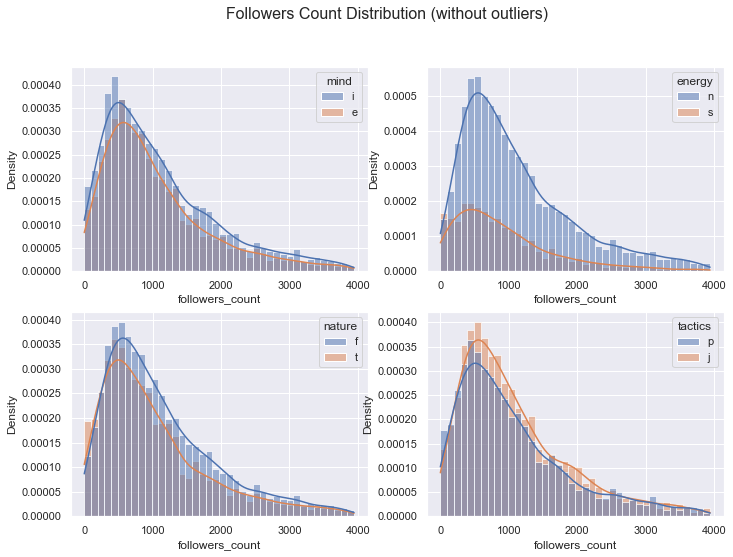

In [82]:
plt.subplot(2, 2, 1)
sns.histplot(data=remove_outliers_for_df(member_df, 'followers_count'), x='followers_count', 
             kde = True, hue="mind", stat="density");
plt.subplot(2, 2, 2)
sns.histplot(data=remove_outliers_for_df(member_df, 'followers_count'), x='followers_count', 
             kde = True, hue='energy', stat="density");
plt.subplot(2, 2, 3)
sns.histplot(data=remove_outliers_for_df(member_df, 'followers_count'), x='followers_count', 
             kde = True, hue='nature', stat="density");
plt.subplot(2, 2, 4)
sns.histplot(data=remove_outliers_for_df(member_df, 'followers_count'), x='followers_count', 
             kde = True, hue='tactics', stat="density");
plt.suptitle(t="Followers Count Distribution (without outliers)", fontsize=16);

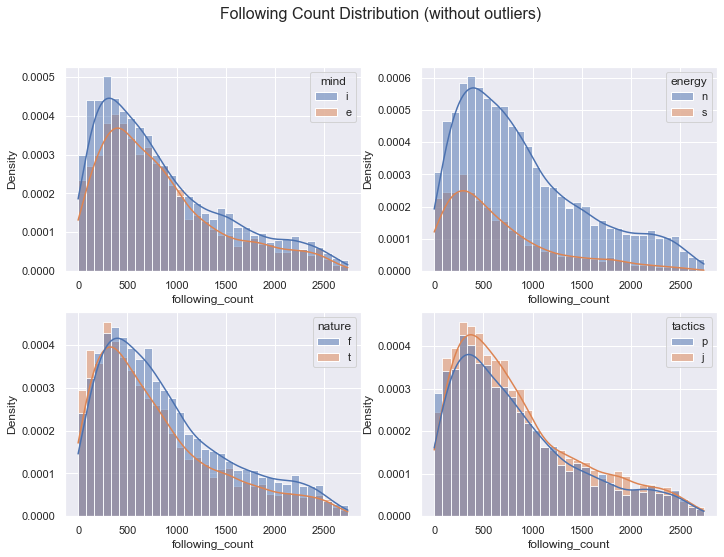

In [83]:
plt.subplot(2, 2, 1)
sns.histplot(data=remove_outliers_for_df(member_df, 'following_count'), x='following_count', 
             kde = True, hue="mind", stat="density");
plt.subplot(2, 2, 2)
sns.histplot(data=remove_outliers_for_df(member_df, 'following_count'), x='following_count', 
             kde = True, hue='energy', stat="density");
plt.subplot(2, 2, 3)
sns.histplot(data=remove_outliers_for_df(member_df, 'following_count'), x='following_count', 
             kde = True, hue='nature', stat="density");
plt.subplot(2, 2, 4)
sns.histplot(data=remove_outliers_for_df(member_df, 'following_count'), x='following_count', 
             kde = True, hue='tactics', stat="density");
plt.suptitle(t="Following Count Distribution (without outliers)", fontsize=16);

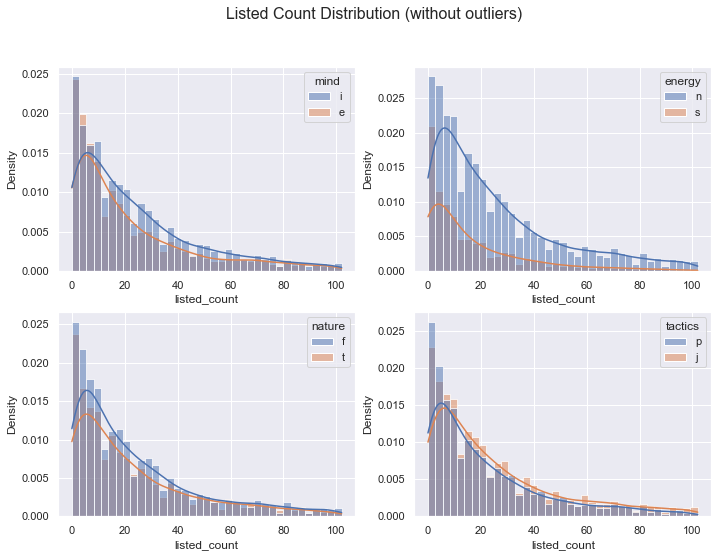

In [84]:
plt.subplot(2, 2, 1)
sns.histplot(data=remove_outliers_for_df(member_df, 'listed_count'), x='listed_count', 
             kde = True, hue="mind", stat="density");
plt.subplot(2, 2, 2)
sns.histplot(data=remove_outliers_for_df(member_df, 'listed_count'), x='listed_count', 
             kde = True, hue='energy', stat="density");
plt.subplot(2, 2, 3)
sns.histplot(data=remove_outliers_for_df(member_df, 'listed_count'), x='listed_count', 
             kde = True, hue='nature', stat="density");
plt.subplot(2, 2, 4)
sns.histplot(data=remove_outliers_for_df(member_df, 'listed_count'), x='listed_count', 
             kde = True, hue='tactics', stat="density");
plt.suptitle(t="Listed Count Distribution (without outliers)", fontsize=16);

In [132]:
member_df.columns

Index(['mbti_personality', 'id', 'followers_count', 'following_count',
       'listed_count', 'Four_Type', 'log_10_follwers_count',
       'log_10_following_count', 'log_10_listed_count', 'mind', 'energy',
       'nature', 'tactics'],
      dtype='object')

In [133]:
member_df['UserActiveness'] = member_df['followers_count']*0.4+member_df['following_count']*0.4+member_df['listed_count']*0.2

In [134]:
member_df.head()

,mbti_personality,id,followers_count,following_count,listed_count,Four_Type,log_10_follwers_count,log_10_following_count,log_10_listed_count,mind,energy,nature,tactics,UserActiveness
0,infp,160881623,1904,782,67,Diplomats,3.279690,2.893262,1.826723,i,n,f,p,1087.8
1,infp,28968838,14135,1338,47,Diplomats,4.150299,3.126489,1.673021,i,n,f,p,6198.6
2,infp,2325006565,1223,604,31,Diplomats,3.087462,2.781109,1.492760,i,n,f,p,737.0
3,infp,907848145,8512,312,147,Diplomats,3.930037,2.494294,2.167613,i,n,f,p,3559.0
4,infp,1330237585,1805,340,69,Diplomats,3.256501,2.531607,1.839478,i,n,f,p,871.8


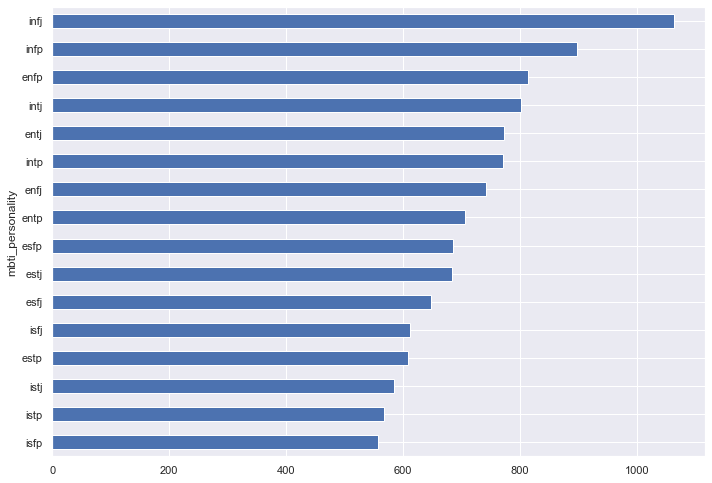

In [148]:
member_df.groupby('mbti_personality').median()['UserActiveness'].sort_values().plot(kind = 'barh');

In [151]:
member_df.columns

Index(['mbti_personality', 'id', 'followers_count', 'following_count',
       'listed_count', 'Four_Type', 'log_10_follwers_count',
       'log_10_following_count', 'log_10_listed_count', 'mind', 'energy',
       'nature', 'tactics', 'UserActiveness'],
      dtype='object')

In [157]:
member_df_wo = remove_outliers_for_df(member_df, 'followers_count')
member_df_wo = remove_outliers_for_df(member_df_wo, 'following_count')
member_df_wo= remove_outliers_for_df(member_df_wo, 'listed_count')

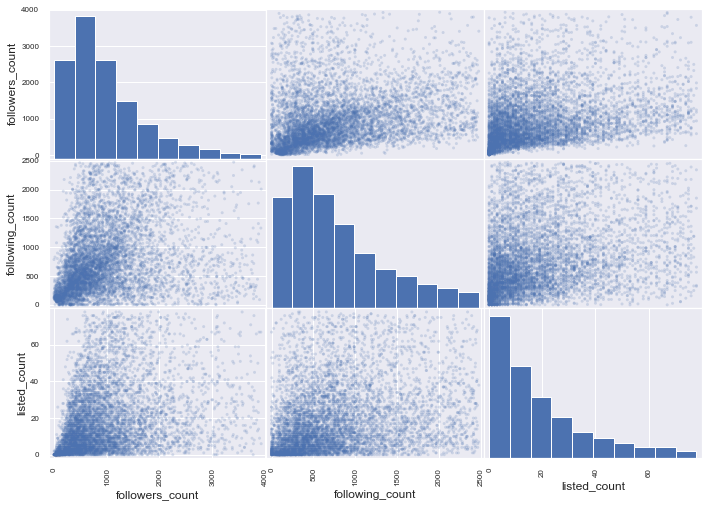

In [158]:
pd.plotting.scatter_matrix(member_df_wo[['followers_count', 'following_count', 'listed_count']], alpha=0.2);

In [159]:
tweet_df.columns

Index(['mbti_personality', 'id', 'liked_count', 'total_tweets_count',
       'total_hashtag_count', 'Four_Type', 'log_10_liked_count',
       'log_10_total_tweets_count', 'log_10_total_hashtag_count', 'mind',
       'energy', 'nature', 'tactics'],
      dtype='object')

In [160]:
tweet_df_wo = remove_outliers_for_df(tweet_df, 'liked_count')
tweet_df_wo = remove_outliers_for_df(tweet_df_wo, 'total_tweets_count')
tweet_df_wo = remove_outliers_for_df(tweet_df_wo, 'total_hashtag_count')

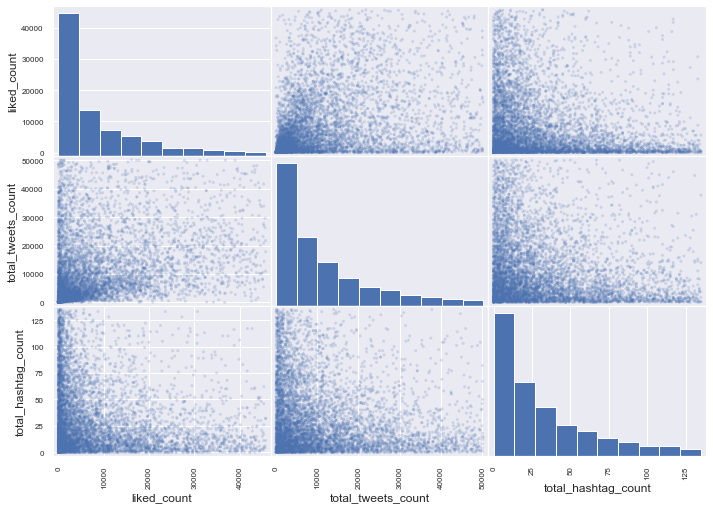

In [161]:
pd.plotting.scatter_matrix(tweet_df_wo[['liked_count', 'total_tweets_count', 'total_hashtag_count']], alpha=0.2);

In [165]:
engagement_df

,mbti_personality,id,followers_count,following_count,listed_count,Four_Type,log_10_follwers_count,log_10_following_count,log_10_listed_count,liked_count,total_tweets_count,total_hashtag_count,log_10_liked_count,log_10_total_tweets_count,log_10_total_hashtag_count,Tweeting Activeness,Interaction Activeness
0,infp,160881623,1904,782,67,Diplomats,3.279690,2.893262,1.826723,133836,410600,50,5.126573,5.613419,1.699838,238771.50,1087.8
1,infp,28968838,14135,1338,47,Diplomats,4.150299,3.126489,1.673021,103794,358901,82,5.016173,5.554975,1.914343,205419.50,6198.6
2,infp,2325006565,1223,604,31,Diplomats,3.087462,2.781109,1.492760,178178,312384,71,5.250854,5.494689,1.851870,200754.25,737.0
3,infp,907848145,8512,312,147,Diplomats,3.930037,2.494294,2.167613,40136,282995,77,4.603535,5.451779,1.887054,151550.75,3559.0
4,infp,1330237585,1805,340,69,Diplomats,3.256501,2.531607,1.839478,151521,244181,16,5.180473,5.387712,1.206826,159974.75,871.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,estj,489644768,289,264,10,Sentinels,2.461048,2.421768,1.004321,442,265,15,2.645521,2.423410,1.178977,246.75,223.2
8324,estj,3061139834,43,128,0,Sentinels,1.634477,2.107549,-1.000000,6,245,257,0.785330,2.389343,2.410102,188.25,68.4
8325,estj,329077476,103,115,0,Sentinels,2.013259,2.061075,-1.000000,45,112,46,1.654177,2.049606,1.663701,78.75,87.2
8326,estj,781835161394614272,49,119,0,Sentinels,1.691081,2.075912,-1.000000,2,75,29,0.322219,1.875640,1.463893,45.25,67.2


# T-test
1. Data are continuous ✅
2. Normally distributed
3. Equal variance b/w groups (but can use Welch’s test!) use Welch’s test
4. Not paired (will talk more about this later) ✅

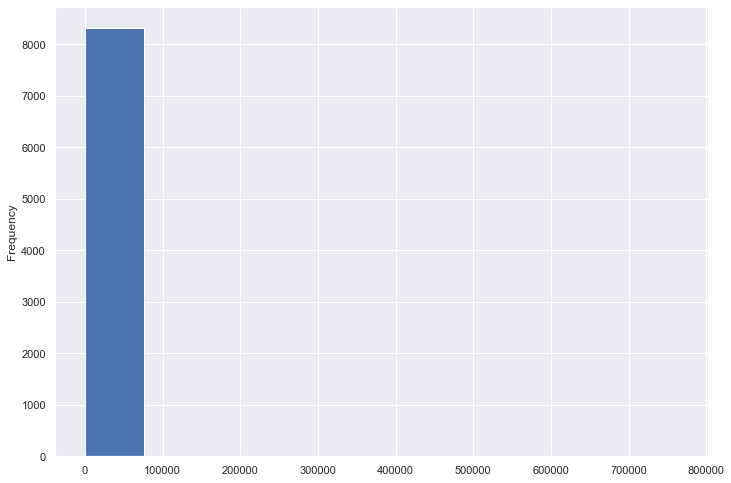

In [180]:
engagement_df['Interaction Activeness'].plot(kind = 'hist');

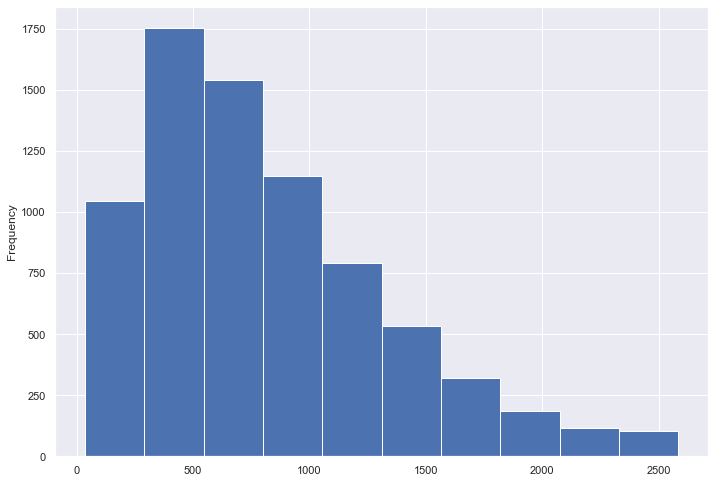

In [181]:
remove_outliers_for_df(engagement_df, 'Interaction Activeness')['Interaction Activeness'].plot(kind = 'hist');

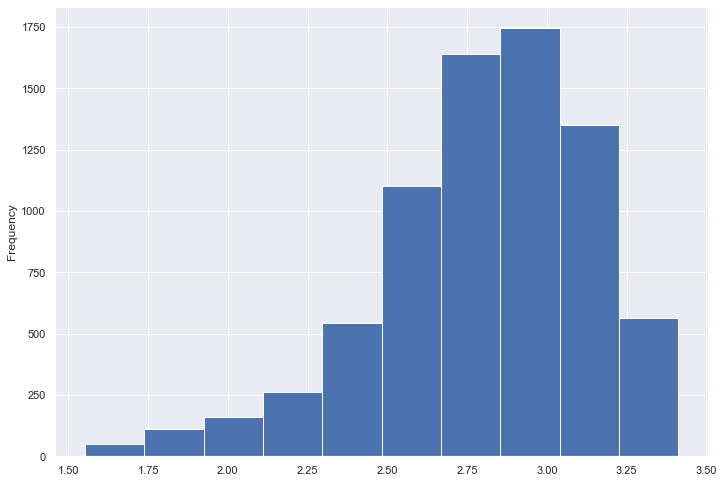

In [182]:
remove_outliers_for_df(engagement_df, 'Interaction Activeness')['Interaction Activeness'].apply(np.log10).plot(kind = 'hist');

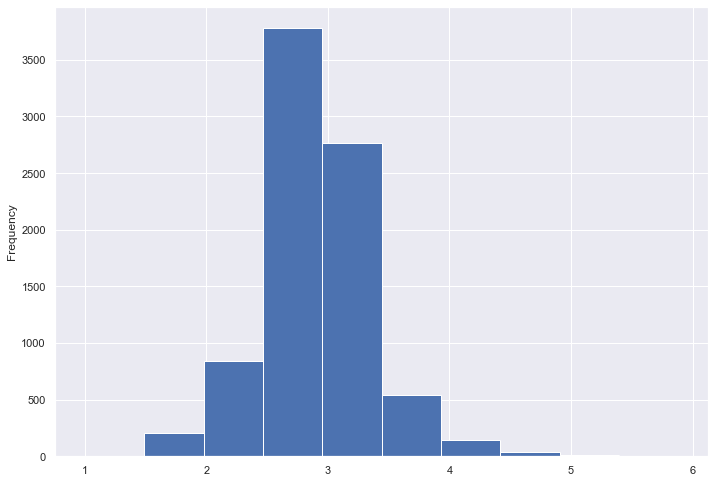

In [183]:
engagement_df['Interaction Activeness'].apply(np.log10).plot(kind = 'hist');

In [179]:
exp_df = remove_outliers_for_df(member_df, 'UserActiveness')
exp_df['User Activeness log10'] = exp_df['UserActiveness'].apply(np.log10)
exp_df[['User Activeness log10', 'mind']].groupby('mind').var()

/var/folders/8p/rkfnf83x2xj054q1r8n6xhjm0000gn/T/ipykernel_26343/3296996469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['User Activeness log10'] = exp_df['UserActiveness'].apply(np.log10)


,User Activeness log10
mind,
e,0.105253
i,0.117044


In [184]:
member_df['mind'].unique()

array(['i', 'e'], dtype=object)

In [ ]:
member_df[member_df['mind']=='i']['UserActiveness']

#permutation test?

In [192]:
t_val, p_val = stats.ttest_ind(member_df[member_df['mind']=='i']['UserActiveness'], member_df[member_df['mind']=='e']['UserActiveness'] )

if p_val < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')
t_val, p_val

There is a significant difference.


(2.3438296496963074, 0.019110276839983672)

In [194]:
member_df.columns

Index(['mbti_personality', 'id', 'followers_count', 'following_count',
       'listed_count', 'Four_Type', 'log_10_follwers_count',
       'log_10_following_count', 'log_10_listed_count', 'mind', 'energy',
       'nature', 'tactics', 'UserActiveness'],
      dtype='object')

In [197]:
t_val, p_val = stats.ttest_ind(member_df[member_df['energy']=='n']['UserActiveness'], member_df[member_df['energy']=='s']['UserActiveness'] )

if p_val < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')
t_val, p_val

There is a significant difference.


(2.984365300437957, 0.0028499244704967095)

In [198]:
t_val, p_val = stats.ttest_ind(member_df[member_df['nature']=='f']['UserActiveness'], member_df[member_df['nature']=='t']['UserActiveness'] )

if p_val < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')
t_val, p_val

There is NO significant difference!


(-0.40164224323176545, 0.6879576447600857)

In [200]:
t_val, p_val = stats.ttest_ind(member_df[member_df['tactics']=='p']['UserActiveness'], member_df[member_df['tactics']=='j']['UserActiveness'] )

if p_val < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')
t_val, p_val

There is NO significant difference!


(-0.2727629476582523, 0.7850422078049836)

In [202]:
member_df['UserActiveness'].values

array([1087.8, 6198.6,  737. , ...,   87.2,   67.2,   91.8])

In [291]:
obs_diff_mind = member_df[['mind', 'UserActiveness']].groupby('mind').mean().diff().loc['i', 'UserActiveness']
obs_diff_mind = abs(obs_diff_mind )
obs_diff_mind

561.6112602207791

In [282]:
is_i = np.array(member_df['mind']=='i')
user_activeness = member_df['UserActiveness'].values
n_i = is_i.sum()
n_e = member_df.shape[0] - n_i

is_i_permutations = np.column_stack([
    np.random.permutation(is_i)
    for _ in range(1000)
]).T

mean_i = (user_activeness * is_i_permutations).sum(axis=1) / n_i
mean_e = (user_activeness * ~is_i_permutations).sum(axis=1) / n_e
#differences = pd.Series(mean_i - mean_e)
differences = pd.Series(np.abs(mean_i - mean_e))

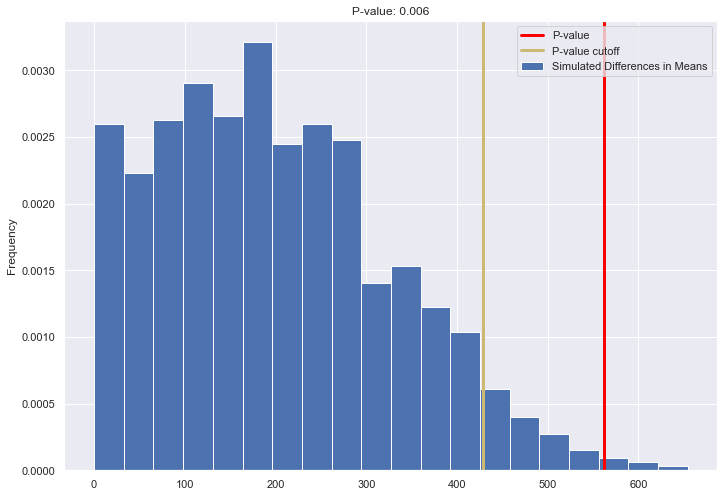

In [283]:
pval = (differences >= obs_diff_mind).mean()
differences.plot(kind='hist', density=True, ec='w', bins=20, title=f'P-value: {pval}', label='Simulated Differences in Means')
plt.axvline(x=obs_diff, color='red', linewidth=3, label='P-value')

perc = np.percentile(differences, 95) # 5% significance level
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();

In [289]:
obs_diff_energy = member_df[['energy', 'UserActiveness']].groupby('energy').mean().diff().iloc[-1, 0]
#obs_diff_energy = np.abs(obs_diff_energy)
obs_diff_energy

-830.1588934302681

In [252]:
is_n = np.array(member_df['energy']=='n')
user_activeness = member_df['UserActiveness'].values
n_n = is_n.sum()
n_s = member_df.shape[0] - n_n

is_n_permutations = np.column_stack([
    np.random.permutation(is_n)
    for _ in range(1000)
]).T

mean_n = (user_activeness * is_n_permutations).sum(axis=1) / n_n
mean_s = (user_activeness * ~is_n_permutations).sum(axis=1) / n_s
differences = pd.Series(np.abs(mean_n - mean_s))

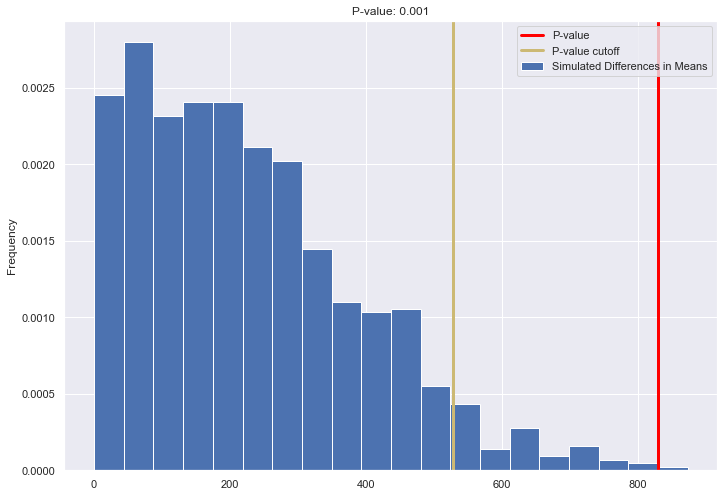

In [254]:
pval = (differences >= obs_diff_energy).mean()
differences.plot(kind='hist', density=True, ec='w', bins=20, title=f'P-value: {pval}', label='Simulated Differences in Means')
plt.axvline(x=obs_diff_energy, color='red', linewidth=3, label='P-value')

perc = np.percentile(differences, 95) # 5% significance level
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();

In [259]:
obs_diff_nature = member_df[['nature', 'UserActiveness']].groupby('nature').mean().diff().iloc[-1, 0]
obs_diff_nature = np.abs(obs_diff_nature)
obs_diff_nature

96.01850064435143

In [266]:
is_f = np.array(member_df['nature']=='f')
user_activeness = member_df['UserActiveness'].values
n_f = is_f.sum()
n_t = member_df.shape[0] - n_f

is_f_permutations = np.column_stack([
    np.random.permutation(is_f)
    for _ in range(1000)
]).T

mean_f = (user_activeness * is_f_permutations).sum(axis=1) / n_f
mean_t = (user_activeness * ~is_f_permutations).sum(axis=1) / n_t
differences = pd.Series(np.abs(mean_f - mean_t))

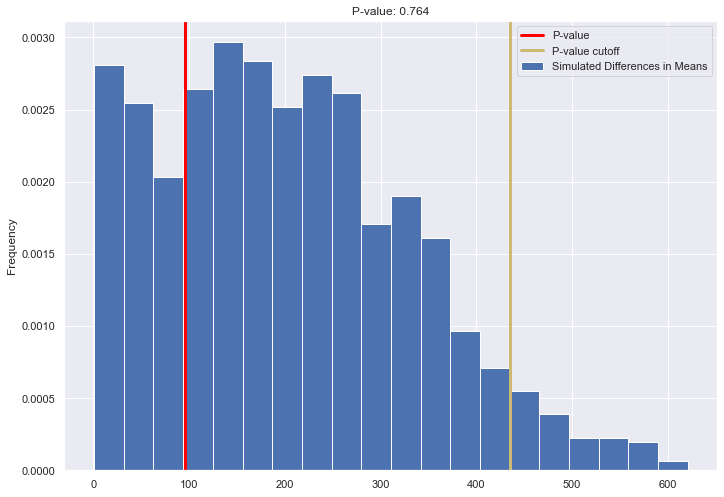

In [267]:
pval = (differences >= obs_diff_nature).mean()
differences.plot(kind='hist', density=True, ec='w', bins=20, title=f'P-value: {pval}', label='Simulated Differences in Means')
plt.axvline(x=obs_diff_nature, color='red', linewidth=3, label='P-value')

perc = np.percentile(differences, 95) # 5% significance level
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();

## To Do: switch `member_df` and `tweet_df` to `engagement_df`

## To Do: also apply the above (remove outlier, draw density histogram) to the `tweet_df`

## To Do: more detials (add more texts and explanations, add subtitle to plots)

## To Do: Relationship btw variables (bivariate analysis & interesting aggregate) e.g. scatter_matrix, overlaid horizontal bar chart by personality types (median)

## To Do: emoji visualization (e.g. wordle)

## Part II: Emoji 😄 (Datasets #1, #2, #3, #4)

In this section, we use emoji for Twitter users' activeness and engagment information analysis and sentiment exploration. We extract emoji from twitter_MBTI.csv(text_df) and user_tweets.csv (user_df) which contains tweets information. To obtain the personality type information, we also created a merged_df by combining mini_user_df (a subset of cleaned user_df) and mbti_labels.csv (user_mbti_df).

In [85]:
text_df.head()

,Unnamed: 0,text,label
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,1,@Hispanthicckk Being you makes you look cute||...,intj
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


In [86]:
text_df.shape

(7811, 3)

In [87]:
user_df.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_191,tweet_192,tweet_193,tweet_194,tweet_195,tweet_196,tweet_197,tweet_198,tweet_199,tweet_200
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,NOOOOOOOOOOO MURCIA HA CAÍDO TAMBIÉN 😔😔😔,@ederugaruto Si te están amenazando de esa man...,19. Siempre me han encantado los días de fuego...,RT @pupa_puuupa: 4〜6 https://t.co/Hhdv33tWOi,RT @TANA_in_: 뜨거운 여름 밤은 가고 남은 건 볼품없지만 https://...,RT @Vivi95862484: ❤️💙 https://t.co/OAv2F1FKLc,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @GingerSpirits: AB giving me Lucas content?...,RT @musicfanforeva2: god bless the writers of ...,RT @AtheerforAnne: @TahiraOsman4 https://t.co/...,RT @TahiraOsman4: Who can pinpoint the exact m...,"RT @TahiraOsman4: Dear Gilbert,\n\nI'm throwin...",RT @TahiraOsman4: (ANNE NATION)\n\nwe are ever...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,RT @NYLONJAPAN: “今週何買う？”をテーマに男女共に楽しめるファッションページ...,@coffeebourbon OMFG,RT @MLBJapan: 【 #ドジャース 】3度の #サイヤング賞 左腕が今日も好投！3...,RT @LDH__TV: 本日21時配信📺\n大好評🎉✨16人での慰安旅行未公開ベスト10🎞...,I pressed the up button on an elevator that wa...,笑,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",NaN
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,RT @sehunownsme: [hunstagram] Remember to your...,RT @mishyeol: [🖼WP] \nEXO-L Welcome Kit Photo ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,nothing as expected,this game was a mistake,fuck it 

In [88]:
user_df.shape

(24598, 201)

In [89]:
user_mbti_df = label_df
user_mbti_df.head()

,id,mbti_personality
0,160881623,infp
1,28968838,infp
2,2325006565,infp
3,907848145,infp
4,1330237585,infp


### 1) Drop useless columns and set meaningful index
We drop `Unnamed: 0` column in the `text_df` since it is a series of duplicate indices.
We set the index of `user_df` and `user_mbti_df` with `id` column since it uniquely indentify each Twitter user.

In [90]:
text_df = text_df.drop('Unnamed: 0', axis=1)
user_df = user_df.set_index('id', drop = True)
user_mbti_df = user_mbti_df.set_index('id', drop = True)

### 2) Checking column's datatype
According to the `DtypeWarning`, we have mixed data types in multiple columns (all tweets column). To remove this warning, we will first convert `id` column and all tweet columns from mixed object type to tidy object type (string type).

In [91]:
user_df.dtypes

tweet_1      object
tweet_2      object
tweet_3      object
tweet_4      object
tweet_5      object
              ...  
tweet_196    object
tweet_197    object
tweet_198    object
tweet_199    object
tweet_200    object
Length: 200, dtype: object

In [92]:
user_df = user_df.astype(str)

### 3) Checking missingness
- There are multiple `'nan'` values in `user_df`. Since we only care about the emoji in tweets, we decide to only keep the first 10 tweets of each Twitter users and combine each Twitter users' tweets into a single megatweet. Thus, we will only need to drop 16 Twitter users with 0 tweets, which will not affect our general analysis.
- There is no missingness in `text_df`, and `user_mbti_df`. Thus, we do not need to deal with `NaN` values.

In [93]:
user_df.isna().sum(axis = 0).sum()

0

In [94]:
user_df.isin(['nan', 'NaN']).sum(axis = 0).iloc[:10]

tweet_1        16
tweet_2      5681
tweet_3     11514
tweet_4     11516
tweet_5     11517
tweet_6     11518
tweet_7     11518
tweet_8     11521
tweet_9     11521
tweet_10    11522
dtype: int64

In [95]:
user_df = user_df[user_df['tweet_1'] != 'nan']

In [96]:
user_df.isin(['nan', 'NaN']).sum(axis = 0).iloc[:10]

tweet_1         0
tweet_2      5665
tweet_3     11498
tweet_4     11500
tweet_5     11501
tweet_6     11502
tweet_7     11502
tweet_8     11505
tweet_9     11505
tweet_10    11506
dtype: int64

In [97]:
text_df.isna().sum(axis = 0).sum()

0

In [98]:
text_df.isin(['nan', 'NaN']).sum(axis = 0)

text     0
label    0
dtype: int64

In [99]:
user_mbti_df.isna().sum(axis = 0).sum()

0

In [100]:
user_mbti_df.isin(['nan', 'NaN']).sum(axis = 0)

mbti_personality    0
dtype: int64

### 4) Extract emoji
#### 4.1 extract emoji from `text_df`

In [101]:
#method that return a list of distinct emoji from a given string
def find_distinct_emoji(text):
    return emoji.distinct_emoji_list(text)

In [102]:
#method that return the number of emoji from a given string
def find_emoji_count(text):
    return emoji.emoji_count(text)

In [103]:
#find distinct emoji in each tweet
text_df['emoji'] = text_df['text'].apply(find_distinct_emoji)
text_df['emoji'] 

0                                        [👆, 😏, 😎, 🇬🇧, 😳]
1                                   [😉, 😏, 🤤, 😂, 🙂, 😎, 😘]
2                        [😭, 👋, ☠️, 😍, ✌🏻, 🧍🏻‍♀️, 🤏🏻, 🤜🏻]
3                                                      []
4       [🤣, 🎁, 👋, 🤧, 🥹, 🎊, 😂, 🥺, 😪, 🌚, 🙂, 🥲, 😊, 👏, ❤️, 🙄]
                              ...                        
7806          [👄, 😭, 😼, ☹️, 😕, 🐻, 😔, 🫶🏼, 👁️, 💀, 🫶🏽, ✨, 💔]
7807    [🥶, ‼️, 🤬, 🤤, 🙂, ✨, 🔥, 👍, ❤️, 👽, 🙏, 💀, 💪, 😍, ➡...
7808          [😭, 😌, 😢, 💕, 🤘, 💪, 💋, 😍, 🥺, 🔫, 🖕, ✌️, 😘, 🙄]
7809    [😭, ♾️, 😁, 💘, 🤘, 😆, 🤓, 😶, 💙, 🙃, 🤳, 🛶, 🖤, ✨, 👍,...
7810    [🫱, 😭, ☹️, 🏊‍♀️, 💖, 😢, 🤷‍♀️, 🥺, 🫲, 💔, 😖, 🫵, 🥛,...
Name: emoji, Length: 7811, dtype: object

## EDA -------

In [104]:
#find number of emoji in each tweet
text_df['num_of_emoji'] = text_df['text'].apply(find_emoji_count)
text_df['num_of_emoji'] 

0         7
1        15
2        15
3         0
4       107
       ... 
7806     52
7807     38
7808     49
7809     58
7810    159
Name: num_of_emoji, Length: 7811, dtype: int64

In [105]:
# Method that finds all emoji for a given personality type
def create_emoji_lst(personality_type):
    return text_df[text_df['label'] == personality_type]['emoji'].sum()

In [106]:
# Method that returns the total count of all the emoji from the given personality type 
def emoji_total_count(personality_type):
    return text_df[text_df['label'] == personality_type]['num_of_emoji'].sum()

In [107]:
# Method that returns the top 10 emoji from the given personality type 
#and the count of how many times each emoji occurs.
def top_10_emoji_count(personality_type):
    return pd.Series(create_emoji_lst(personality_type)).value_counts().take(np.arange(10))

In [108]:
# Find all personality types
personality_type_lst = text_df['label'].unique()
personality_type_lst

array(['intj', 'intp', 'entj', 'entp', 'infj', 'infp', 'enfj', 'enfp',
       'istj', 'isfj', 'estj', 'esfj', 'istp', 'isfp', 'estp', 'esfp'],
      dtype=object)

In [109]:
# personality types and its total emoji count
personality_df = pd.DataFrame()
personality_df['personality_type'] = pd.Series(personality_type_lst)
personality_df['emoji_count'] = personality_df['personality_type'].apply(emoji_total_count)
personality_df

,personality_type,emoji_count
0,intj,42342
1,intp,43747
2,entj,14676
3,entp,27511
4,infj,72705
5,infp,80143
6,enfj,34790
7,enfp,46998
8,istj,15204
9,isfj,30944


In [110]:
# personality types and its Twitter users count
count_df = text_df.groupby('label').count()[['emoji']].rename(columns = {'emoji':'id_count'})
count_df

,id_count
label,
enfj,518
enfp,729
entj,279
entp,577
esfj,105
esfp,174
estj,81
estp,100
infj,1057


In [111]:
# merge the two previous dataframe and compute emoji per person
personality_df = personality_df.merge(count_df, left_on = 'personality_type', right_index = True)
personality_df['emoji per person'] = personality_df['emoji_count']/personality_df['id_count']
personality_df

,personality_type,emoji_count,id_count,emoji per person
0,intj,42342,781,54.215109
1,intp,43747,811,53.942047
2,entj,14676,279,52.602151
3,entp,27511,577,47.679376
4,infj,72705,1057,68.784295
5,infp,80143,1282,62.514041
6,enfj,34790,518,67.162162
7,enfp,46998,729,64.469136
8,istj,15204,259,58.702703
9,isfj,30944,364,85.010989


In [112]:
# find the top 10 most commonly used emoji for each personality type
for p in personality_type_lst:
    print(p)
    print(top_10_emoji_count(p))

intj
😭     481
😂     248
🥺     227
❤️    206
🥰     196
🤣     170
💀     156
😍     155
🥹     143
😔     135
dtype: int64
intp
😭     543
🥺     261
💀     222
😂     189
🥰     171
😍     170
😔     164
❤️    160
🥹     145
🥲     138
dtype: int64
entj
😭     168
😂      91
❤️     73
🥺      73
💀      63
😍      57
🤣      55
🥰      54
😔      52
🥹      48
dtype: int64
entp
😭     381
💀     151
🥺     148
❤️    123
😂     120
😍     107
😔     100
🥰      97
💔      95
🤣      76
dtype: int64
infj
😭     703
😂     406
🥺     403
❤️    323
🥰     320
😍     268
🤣     263
🥹     240
✨     233
💀     222
dtype: int64
infp
😭     935
🥺     501
❤️    334
🥰     330
😂     315
💀     299
😍     294
🥲     242
🥹     239
😔     239
dtype: int64
enfj
😭     355
🥺     204
😂     176
🥰     160
❤️    146
😍     136
👀     126
🤣     112
🥲     109
🥹     106
dtype: int64
enfp
😭     503
🥺     272
❤️    232
🥰     214
😂     208
😍     190
💀     164
🥹     155
😔     150
🥲     148
dtype: int64
istj
😭     188
🥺      94
😍      75
😂      70
💀      65
❤

##### Observation: 😭 is the top 1 emoji for all personality types

#### 4.2 create `mini_user_df` from `user_df`, merge it with `user_mbti_df`, and extract emoji.

- Since there are a maximum of 200 tweets for a Twitter user, but only a few users have 200 tweets, so we decide to only include 10 tweets from each users and combine each of them to a megatweet.

In [113]:
# Extract the first 10 user tweets from all users
mini_user_df = user_df.iloc[:,:11]
mini_user_df

,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,tweet_10,tweet_11
id,,,,,,,,,,,
160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,RT @ebiebieshrimp: 構ってほしい https://t.co/TJi7qjktil,RT @cryptidsock: asakusa gets a haircut\n\n#映像...
28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,chico understands the most and probably from a...,let's talk about how chico loves luz like his ...
2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,RT @pernilleru: A Japanese language version of...,RT @AndreiAndrei63: Cool kitty.😍🐯🐾 https://t.c...
907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,RT @knockknock0408: KAI ins\n@weareoneEXO http...,RT @knockknock0408: KAI \n@weareoneEXO https:/...
1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,I’d K*LL for one 2019 pamphlet https://t.co/QG...,🏃 💨 https://t.co/VtPKf690EJ
...,...,...,...,...,...,...,...,...,...,...,...
489644768,RT @vonerhan: There’s more to the story. SoulC...,"Also 👇🏼 - in college, I used to bake my feelin...",Last night something incredible happened. I sp...,@vonerhan All on the heels of Opening Ceremony...,@vonerhan @Spotify This almost feels more pers...,RT @jkk: These badass women built huge BILLION...,RT @rezakhadjavi: 2010s: decade of growth hack...,"Today, as I sit among my fellow female investo...",+ never forget @itumasovIBM 's 5 minutes of fa...,"For all my podcast-loving friends, I'm so thri...",@laurachau @lfell2009 @coterieparty 👏🏼 so pump...
3061139834,"I don't need a man, I just need my mom 😂😭💞💞😍😍 ...",@estjHoran @batangususan look at the date,I love you daw sabi ni jen.,RT @intrepidnouis: RT THIS \n#TOMORROWProjectN...,😢😢😢 #AlwaysInOurHeartsZaynMalik,@babymigsvergara wala pa sinasabi yung smart n...,Waiting for @SMARTPromos mechanics !! omg last...,RT @SMARTPromos: DIRECTIONERS! Get those art s...,I wanna fangirl wth @babymigsvergara dance all...,I wanna fangirl wth @babymigsvergara dance all...,I wanna fangirl wth @babymigsvergara dance all...
329077476,RT @Mo

In [114]:
#convert index type
user_mbti_df.index = user_mbti_df.index.astype(str)
user_mbti_df

,mbti_personality
id,
160881623,infp
28968838,infp
2325006565,infp
907848145,infp
1330237585,infp
...,...
489644768,estj
3061139834,estj
329077476,estj


In [115]:
#merge the dataframe with tweets and the the dataframe with personality types
merged_df = mini_user_df.merge(user_mbti_df, left_index=True, right_index = True)
merged_df

,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,tweet_10,tweet_11,mbti_personality
id,,,,,,,,,,,,
1000011739210108928,RT @gayspacegulag: reshare if you hate the uni...,RT @ULTRAGLOSS: girls will have anemia and be ...,RT @MMMMateuss: -Mas o que q tu tas a fazer?\n...,RT @5sosandspn: halsey was NOT unprofessional ...,RT @electricfrxst: coronavirus: sup\n*chá da e...,hi guys! I haven't been on Twitter that much c...,RT @tenthletter_: Pineapple and non-pineapple ...,RT @Keally22: Was anyone else deeply terrified...,RT @talltaiI: comedians can quit their jobs no...,RT @shrncartcr: look how dr. doofenshmirtz had...,RT @jellyroki: Me asking to be in gcs and then...,isfj
1000097329997893632,RT @The_WriteReads: The #reviewoftheday comes ...,@bjornlarssen Sending spoons.,RT @BooksNest: If you're 50 pages into a book ...,Our puppy loves his @Carhartt hat! ❤🐶 #keeping...,Mental health is so important. There are time...,Happy Friday! It's time for #FirstLineFriday ...,RT @The_WriteReads: The #blogoftheday comes fr...,"First Line Friday | Ask Again, Yes by Mary Bet...",RT @The_WriteReads: The #reviewoftheday comes ...,RT @kristabellerina: Friend: I don’t drink cof...,RT @SoVeryBritish: “Are you busy?” \nI have mo...,intp
1000151565855023104,Megan’s Aquarius really jumped out when she sa...,RT @hilaryagro: @ndrew_lawrence People need to...,RT @ColeEscola: I wish I were this selfless ht...,RT @ReadByTheSun: ♑︎ Capricorn | ♒︎ Aquarius (...,@destineybleu Absolutely horrible. It takes 24...,@Nathalie19zzy Thank you!! 🥰,@cordinatedchaos thank you so much ☺️,@theEmpyrealCap 🤑🤑,@capriciouscappy Thank you!! 😁,RT @destineybleu: . https://t.co/jMuZExzzgh,@sarahmazing Thank you!! ☺️,infj
1000222156909940737,💤🌙☁ https://t.co/Suzod0S238,@bklyngal196 @tvdeets @melissagorga I think Je...,"@MagiciansSYFY Yes, he must, and I feel like i...","What the hell is up with people who Tweet: ""Oh...",RT @tomhanks: https://t.co/pgybgIYJdG,@66Bill66 @Sanity4243 This is true.\n\nMy daug...,RT @kitty_tatty: Too cute @Thaoriginalgata @To...,@The_Weirdling That's a fantastic book.,@TonyTodd54 Yes. The Stand meets The Langolier...,https://t.co/ePSEvtbvJ6,"G'night all. Hopefully I'm on later, but I fee...",isfj
1000432467067666432,Eid mubarak everyone ☘️.,@laal204 ليس من الشرط ان ينطبق على الجميع نفس ...,“#ESFP” يفضل ان يعامل الشخص المعجب به بطريقة ف...,#ESFP مزاجي وكثير التفكير، يتعلق بسرعة ويهتم ب...,-#ESFP \nإذا تضايقت افضفض بس بعدها اندم أني طل...,-#ESFP \nاحب اضحك الناس أو على الأقل أكون سبب ...,- #ESFP \nاكره انهم يقولون ما عندنا سالفه غير ...,-#ESFP \nكثير انفهم غلط نادر من يفهمني زين، ود...,@jwclie 💕💕,#ESFP: عاطفيين مُهتمين لمشاعر الآخرين، يكرهون ...,#ESFP هو الذي لو قال كلمة لئيمة بحق اي شخصٍ كا...,esfp
...,...,...,...,...,...,...,...,...,...,...,...,...
999362187851370497,@MajorEnglishEsq @DonutInterns @AITA_reddit I ...,@TD_Canada Thank you! Will do.,RT @lukeisamazing: it's weird how this map abo...,Surely there's some way you can make it possib...,"Hey @TD_Canada, I know my church treasurer has...",@AITA_reddit Oh my God. This could be my son i...,RT @anitafajita15: Lots of folks are marveling...,@LouisatheLast Right? I just want to buy some ...,RT @VampireGhuleh: In the town near me (Llandu...,RT @LiataisLibrary: Heads up for folks in the ...,@Hysteriacore1 @sarahCoco13 @redditships Where...,intj
999435722569539584,@rllQ11 @iClllI_ افضل فلم ؟,@rllQ11 😂♥️,@ilkli7 شكرا🖤,@rllQ11 الله يستر والله حفرت من كثر الضغط😂,@rllQ11 انا من شهر ٣ بديت فاينل وماخلصت الا ال...,@IRIF0 😂😂😂😂😂😂😂,@iiCil7 @Hidan_Ti اسفين,@Hidan_Ti @iiCil7 اوكااايي,@Hidan_Ti @iiCil7 لان والله بكيفي,@Hidan_Ti @iiCil7 اكيد,@Hidan_Ti @iiCil7 ٢٢٢٢😂😂😂,estp
999530060,I love HQ https://t.co/ZsLhgaPWrE,Bless my obsessed ass to go dig through articl...,I'm clearly not going to survive 6 episodes of...,"ABSOLUTELY NO RIGHT TO KILL ME LIKE THIS, EDWA...","NO RIGHT,, no right, n o n e",Clearly this pic owns me. Just put this on my ...,"R.I.P me or /rip me/? Who knows, in any case, ...",WH

In [116]:
#sum all the tweets for each person
merged_df['all_tweets'] = (merged_df['tweet_1']+merged_df['tweet_2']+merged_df['tweet_3']+
                           merged_df['tweet_4']+merged_df['tweet_5']+merged_df['tweet_6']+
                           merged_df['tweet_7']+merged_df['tweet_8']+merged_df['tweet_9']+
                           merged_df['tweet_10']
                          )

In [117]:
#find distinct emoji for each Twitter user
merged_df['all_emoji'] = merged_df['all_tweets'].astype(str).apply(find_distinct_emoji)

In [118]:
#find the number of emoji for each Twitter user
merged_df['num_of_emoji'] = merged_df['all_tweets'].astype(str).apply(find_emoji_count)

In [119]:
# Method that finds all emoji for a given personality type
def create_emoji_lst_2(personality_type):
    return merged_df[merged_df['mbti_personality'] == personality_type]['all_emoji'].sum()

In [120]:
# Method that returns the total count of all the emoji from the given personality type 
def emoji_total_count_2(personality_type):
    return merged_df[merged_df['mbti_personality'] == personality_type]['num_of_emoji'].sum()

In [121]:
# Method that returns the top 10 emoji from the given personality type 
#and the count of how many times each emoji occurs.
def top_10_emoji_count_2(personality_type):
    return pd.Series(create_emoji_lst_2(personality_type)).value_counts().take(np.arange(10))

In [122]:
# find the top 10 most commonly used emoji for each personality type
for p in personality_type_lst:
    print(p)
    print(top_10_emoji_count_2(p))

intj
😂     110
❤️     60
😭      56
🤣      35
✨      28
😍      26
💕      24
🎉      24
🥺      24
🥰      23
dtype: int64
intp
😂     95
😭     66
😍     32
❤️    29
🥺     25
✨     24
🤣     23
🤔     17
😊     16
💕     16
dtype: int64
entj
😂     93
😭     63
❤️    47
🤣     37
😍     36
♥️    22
🥺     21
👀     20
🥰     17
🔥     17
dtype: int64
entp
😂     75
😭     43
❤️    26
🤣     25
🥺     19
😍     19
✨     15
🎉     14
😊     12
🔥     12
dtype: int64
infj
😂     122
❤️     82
😭      50
🥰      44
😍      42
😊      42
🤣      42
💕      37
🥺      37
✨      35
dtype: int64
infp
😂     122
😭      78
❤️     65
✨      53
😍      50
💕      47
🥺      46
🥰      38
👀      35
💜      34
dtype: int64
enfj
😂     101
😭      55
❤️     49
😍      40
✨      37
🤣      35
🥺      30
😊      23
🥰      22
💕      21
dtype: int64
enfp
😂     150
😭      67
❤️     67
😍      51
✨      50
🤣      41
🥺      38
💕      32
🥰      30
😊      27
dtype: int64
istj
😂     60
😭     39
❤️    23
🤣     18
😍     13
✨     11
😢     10
💕     10
💔      9


In [123]:
# personality types and its total emoji count
personality_df_2 = pd.DataFrame()
personality_df_2['personality_type'] = pd.Series(personality_type_lst)
personality_df_2['emoji_count'] = personality_df_2['personality_type'].apply(emoji_total_count_2)
personality_df_2

,personality_type,emoji_count
0,intj,2373
1,intp,1867
2,entj,2143
3,entp,1624
4,infj,3024
5,infp,3118
6,enfj,2487
7,enfp,2995
8,istj,1073
9,isfj,1576


In [124]:
# personality types and its Twitter users count
count_df_2 = merged_df.groupby('mbti_personality').count()[['num_of_emoji']].rename(columns = {'num_of_emoji':'id_count'})
count_df_2

,id_count
mbti_personality,
enfj,723
enfp,900
entj,677
entp,586
esfj,236
esfp,202
estj,221
estp,147
infj,917


In [125]:
# merge the two previous dataframe and compute emoji per person
personality_df_2 = personality_df_2.merge(count_df_2, left_on = 'personality_type', right_index = True)
personality_df_2['emoji per person'] = personality_df_2['emoji_count']/personality_df_2['id_count']
personality_df_2

,personality_type,emoji_count,id_count,emoji per person
0,intj,2373,905,2.622099
1,intp,1867,712,2.622191
2,entj,2143,677,3.165436
3,entp,1624,586,2.771331
4,infj,3024,917,3.297710
5,infp,3118,899,3.468298
6,enfj,2487,723,3.439834
7,enfp,2995,900,3.327778
8,istj,1073,342,3.137427
9,isfj,1576,419,3.761337
